# Libraries and Helper Functions

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def model_evaluation(y, predictions, probabilities, label, scores_df):
    class_labels = ['Not Readmitted', 'Readmitted']
    #calculate accuracy
    accuracy = accuracy_score(y, predictions)
    print('{0} Accuracy: {1:.4f}'.format(label, accuracy))
    #calculate precision
    precision = precision_score(y, predictions)
    print('{0} Precision: {1:.4f}'.format(label, precision))
    #calculate recall
    recall = recall_score(y, predictions)
    print('{0} Recall: {1:.4f}'.format(label, recall))
    #calculate f1
    f1 = f1_score(y, predictions)
    print('{0} F1: {1:.4f}'.format(label, f1))
    #calculate AUC
    fpr, tpr, thresholds = roc_curve(y, probabilities)
    roc_auc = auc(fpr, tpr)
    print('{0} AUC: {1:.4f}'.format(label, roc_auc))
    #plot confusion matrix
    cm = confusion_matrix(y, predictions)
    df_cm = np.transpose( np.transpose(cm) / cm.astype(np.float).sum(axis=1) )
    df_cm = pd.DataFrame(df_cm, index = class_labels, columns = class_labels)
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True, fmt='.3f', cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    scores_df_add = pd.DataFrame([[label, accuracy, precision, recall, f1, roc_auc]],
                             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])
    scores_df = pd.concat([scores_df, scores_df_add])
    return scores_df

In [3]:
def get_feature_importance(feature_importance, features):
    indices = np.argsort(feature_importance)[::-1]
    feature_importance = [feature_importance[i] for i in indices]
    features = [features[i] for i in indices]
    features_index = range(1, len(features) + 1)
    num_features = len(features)
    plt.figure(figsize=(20,20))
    plt.bar(features_index[:num_features], feature_importance[:num_features], align = 'center')
    plt.xticks(features_index[:num_features], features[:num_features], rotation = 'vertical')
    plt.show()

# Load Model Results

In [4]:
parameters_df = pd.read_csv('model_parameters_dataset.csv')
feature_importance_df = pd.read_csv('model_feature_importance_dataset.csv')
train_predictions_df = pd.read_csv('model_train_predictions_dataset.csv')
test_predictions_df = pd.read_csv('model_test_predictions_dataset.csv')

scores_df = pd.DataFrame()

# Best Model Parameters

In [5]:
for i in range(parameters_df.shape[0]):
    print('{0} = {1}'.format(parameters_df.iloc[i]['Name'], parameters_df.iloc[i]['Best Parameters']))
    print('\n')

Logistic Regression = {'penalty': 'l1', 'C': 10.0, 'random_state': 42, 'class_weight': 'balanced'}


XGBoost = {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'min_child_weight': 1, 'n_estimators': 1000, 'subsample': 1, 'seed': 42, 'objective': 'binary:logistic', 'max_depth': 3, 'gamma': 0}


Random Forest = {'min_samples_leaf': 1, 'n_estimators': 1000, 'random_state': 42, 'max_features': 'log2', 'max_depth': 100, 'class_weight': 'balanced'}


XGBoost = {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'min_child_weight': 1, 'n_estimators': 1000, 'subsample': 1, 'reg_lambda': 1, 'seed': 42, 'objective': 'binary:logistic', 'max_depth': 3, 'gamma': 0}


Random Forest Top 40 = {'min_samples_leaf': 100, 'n_estimators': 1000, 'random_state': 42, 'max_features': 0.3, 'max_depth': 100, 'class_weight': 'balanced'}


Random Forest Top 60 = {'min_samples_leaf': 100, 'n_estimators': 1000, 'random_state': 42, 'max_features': 0.3, 'max_depth': 100, 'class_weight': 'balanced'}


Random Forest Top 70

# Individual Model Results

## Blind Guess Models

### No Readmission

Blind Guess None - Train Accuracy: 0.8235
Blind Guess None - Train Precision: 0.0000
Blind Guess None - Train Recall: 0.0000
Blind Guess None - Train F1: 0.0000
Blind Guess None - Train AUC: 0.5000


/Users/ipatel/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ipatel/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


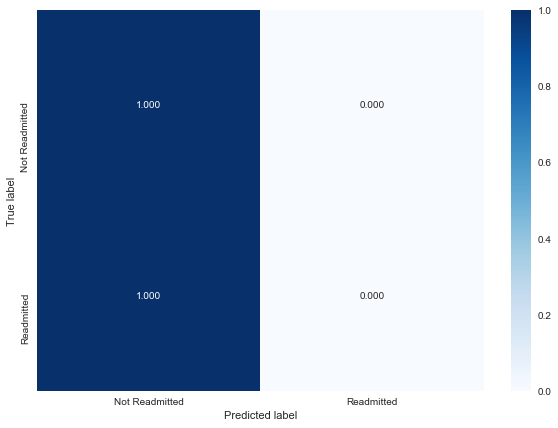

Blind Guess None - Test Accuracy: 0.8175
Blind Guess None - Test Precision: 0.0000
Blind Guess None - Test Recall: 0.0000
Blind Guess None - Test F1: 0.0000
Blind Guess None - Test AUC: 0.5000


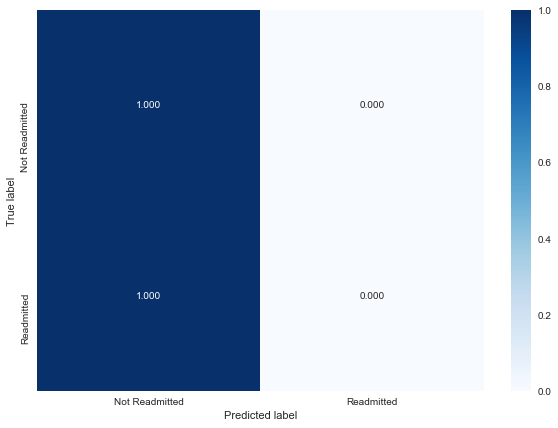

In [6]:
model_name = 'Blind Guess None'
scores_df = model_evaluation(train_predictions_df['READMISSION'],
                                    train_predictions_df[model_name + '_Train_Predictions'], train_predictions_df[model_name + '_Train_Probabilities'],
                                   model_name + ' - Train', scores_df)
scores_df = model_evaluation(test_predictions_df['READMISSION'],
                                    test_predictions_df[model_name + '_Test_Predictions'], test_predictions_df[model_name + '_Test_Probabilities'],
                                   model_name + ' - Test', scores_df)

### Readmission

Blind Guess All - Train Accuracy: 0.1765
Blind Guess All - Train Precision: 0.1765
Blind Guess All - Train Recall: 1.0000
Blind Guess All - Train F1: 0.3000
Blind Guess All - Train AUC: 0.5000


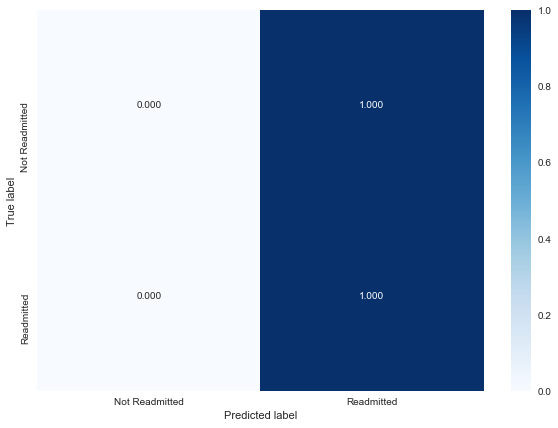

Blind Guess All - Test Accuracy: 0.1825
Blind Guess All - Test Precision: 0.1825
Blind Guess All - Test Recall: 1.0000
Blind Guess All - Test F1: 0.3086
Blind Guess All - Test AUC: 0.5000


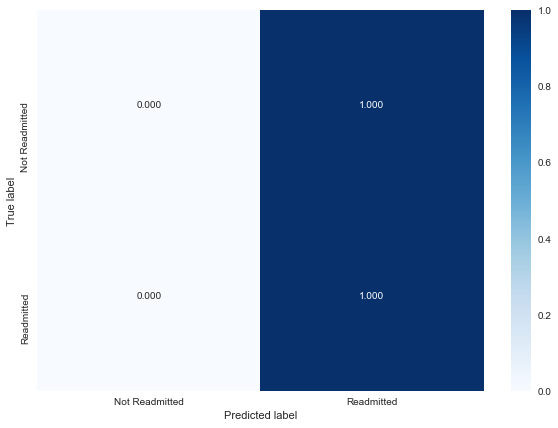

In [7]:
model_name = 'Blind Guess All'
scores_df = model_evaluation(train_predictions_df['READMISSION'],
                                    train_predictions_df[model_name + '_Train_Predictions'], train_predictions_df[model_name + '_Train_Probabilities'],
                                   model_name + ' - Train', scores_df)
scores_df = model_evaluation(test_predictions_df['READMISSION'],
                                    test_predictions_df[model_name + '_Test_Predictions'], test_predictions_df[model_name + '_Test_Probabilities'],
                                   model_name + ' - Test', scores_df)

# Logistic Regression

Logistic Regression - Train Accuracy: 0.6153
Logistic Regression - Train Precision: 0.2851
Logistic Regression - Train Recall: 0.7827
Logistic Regression - Train F1: 0.4180
Logistic Regression - Train AUC: 0.7414


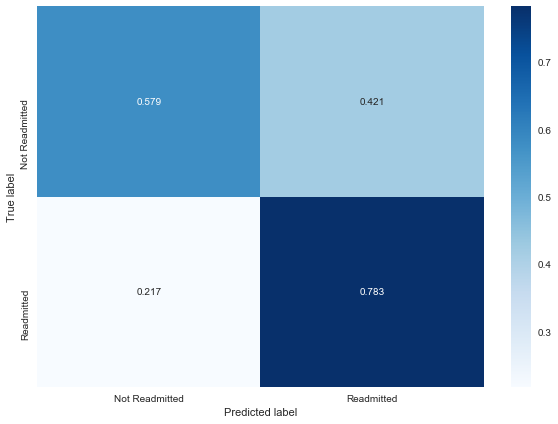

Logistic Regression - Test Accuracy: 0.6082
Logistic Regression - Test Precision: 0.2898
Logistic Regression - Test Recall: 0.7905
Logistic Regression - Test F1: 0.4241
Logistic Regression - Test AUC: 0.7423


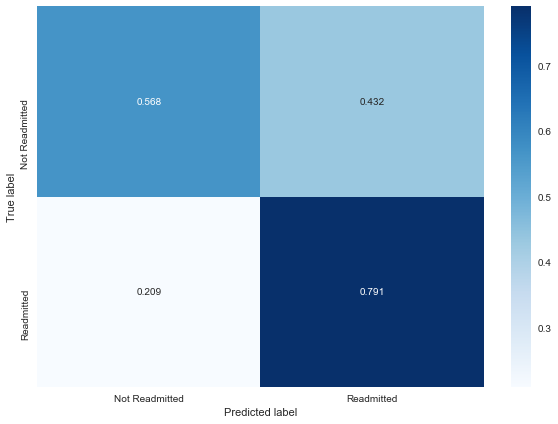

In [8]:
model_name = 'Logistic Regression'
scores_df = model_evaluation(train_predictions_df['READMISSION'],
                                    train_predictions_df[model_name + '_Train_Predictions'], train_predictions_df[model_name + '_Train_Probabilities'],
                                   model_name + ' - Train', scores_df)
scores_df = model_evaluation(test_predictions_df['READMISSION'],
                                    test_predictions_df[model_name + '_Test_Predictions'], test_predictions_df[model_name + '_Test_Probabilities'],
                                   model_name + ' - Test', scores_df)

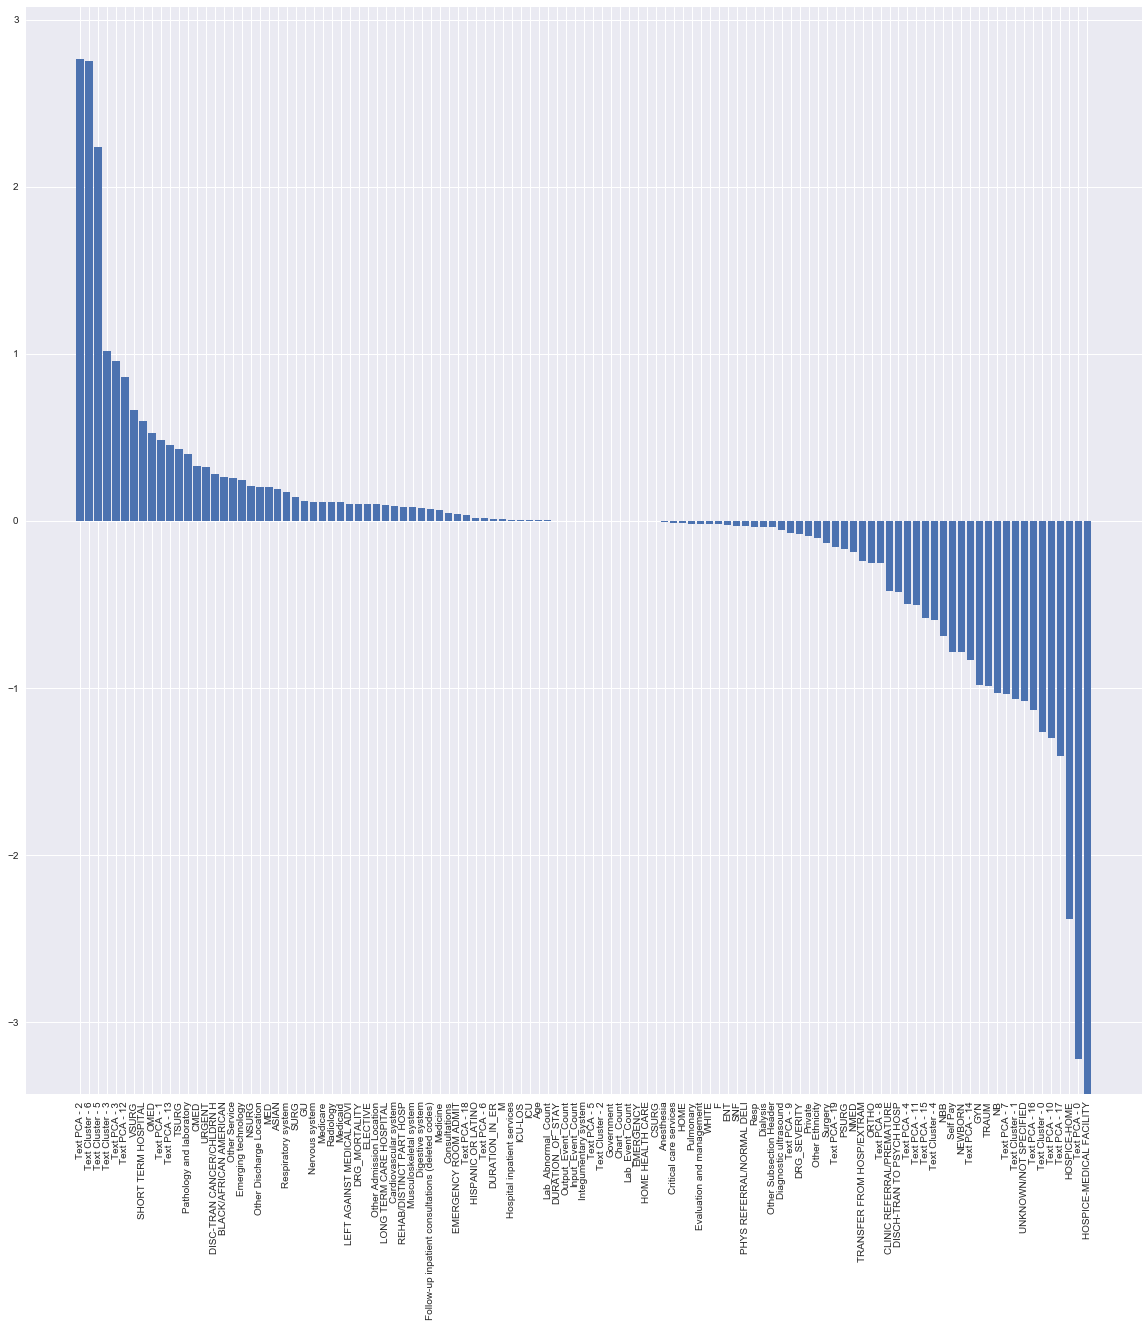

In [9]:
get_feature_importance(feature_importance_df[model_name], feature_importance_df['Features'])

## Random Forest

### All Features

Random Forest - Train Accuracy: 1.0000
Random Forest - Train Precision: 1.0000
Random Forest - Train Recall: 1.0000
Random Forest - Train F1: 1.0000
Random Forest - Train AUC: 1.0000


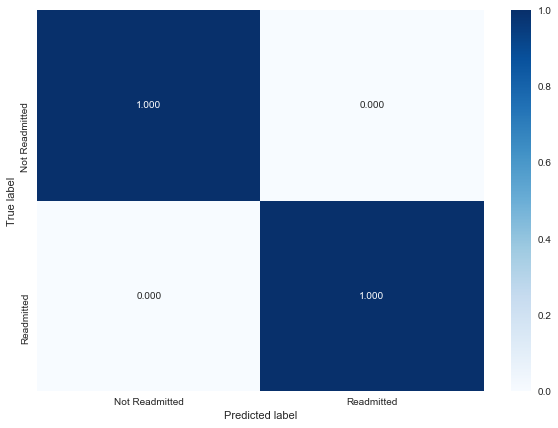

Random Forest - Test Accuracy: 0.8364
Random Forest - Test Precision: 0.8768
Random Forest - Test Recall: 0.1204
Random Forest - Test F1: 0.2117
Random Forest - Test AUC: 0.7875


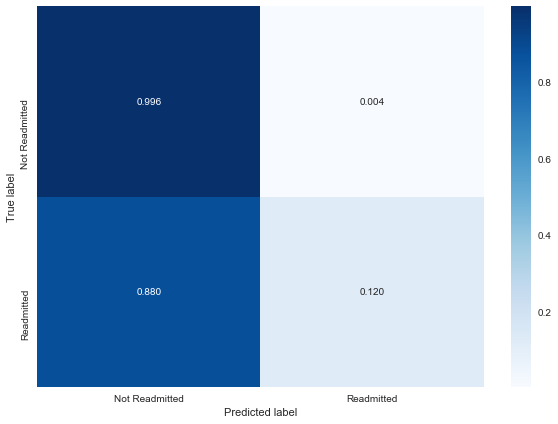

In [10]:
model_name = 'Random Forest All'
scores_df = model_evaluation(train_predictions_df['READMISSION'],
                                    train_predictions_df[model_name + '_Train_Predictions'], train_predictions_df[model_name + '_Train_Probabilities'],
                                   model_name + ' - Train', scores_df)
scores_df = model_evaluation(test_predictions_df['READMISSION'],
                                    test_predictions_df[model_name + '_Test_Predictions'], test_predictions_df[model_name + '_Test_Probabilities'],
                                   model_name + ' - Test', scores_df)

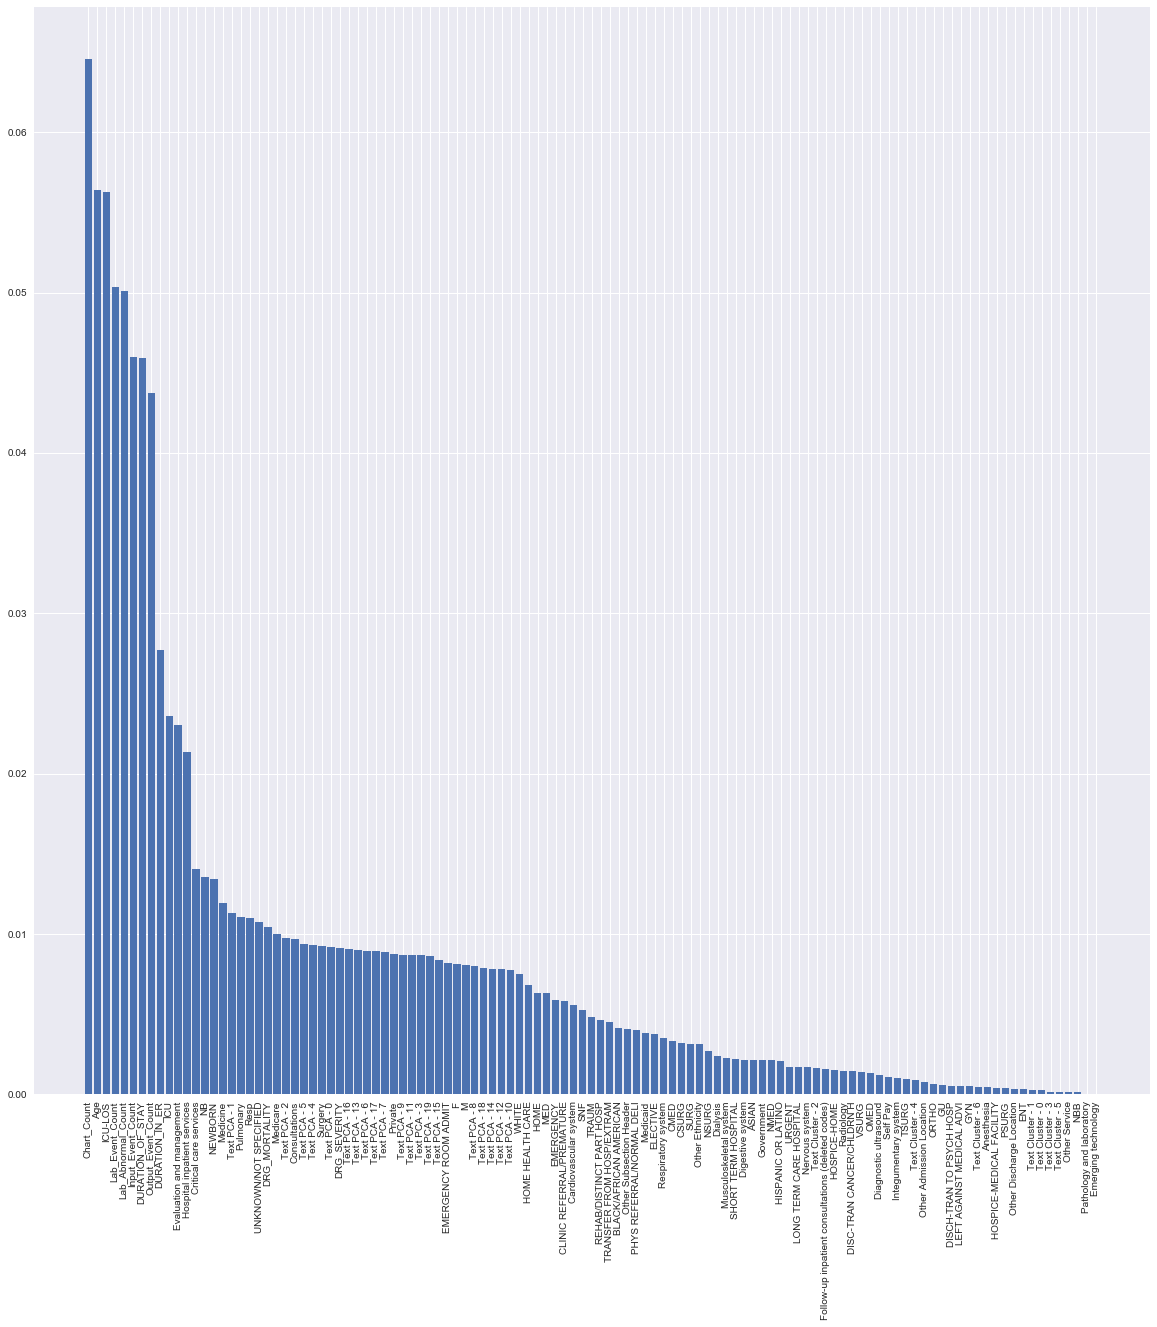

In [11]:
get_feature_importance(feature_importance_df[model_name], feature_importance_df['Features'])

### Top 10 Features

Random Forest Top 10 - Train Accuracy: 0.6989
Random Forest Top 10 - Train Precision: 0.3363
Random Forest Top 10 - Train Recall: 0.7257
Random Forest Top 10 - Train F1: 0.4596
Random Forest Top 10 - Train AUC: 0.8078


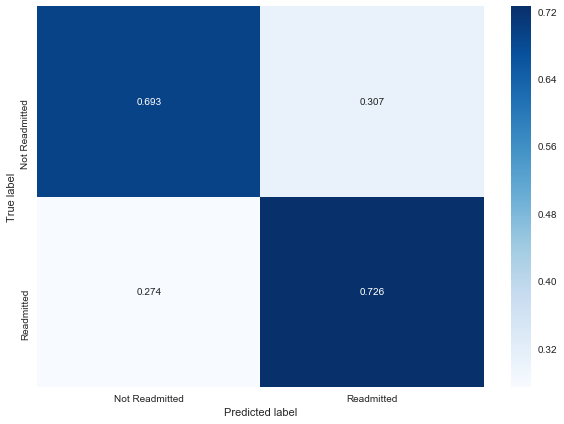

Random Forest Top 10 - Test Accuracy: 0.6829
Random Forest Top 10 - Test Precision: 0.3240
Random Forest Top 10 - Test Recall: 0.6792
Random Forest Top 10 - Test F1: 0.4387
Random Forest Top 10 - Test AUC: 0.7541


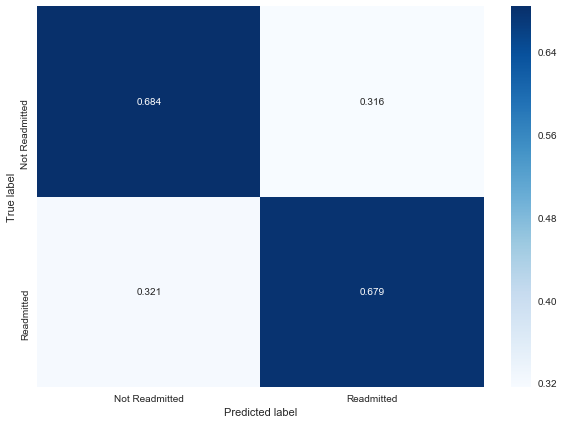

In [12]:
model_name = 'Random Forest Top 10'
scores_df = model_evaluation(train_predictions_df['READMISSION'],
                                    train_predictions_df[model_name + '_Train_Predictions'], train_predictions_df[model_name + '_Train_Probabilities'],
                                   model_name + ' - Train', scores_df)
scores_df = model_evaluation(test_predictions_df['READMISSION'],
                                    test_predictions_df[model_name + '_Test_Predictions'], test_predictions_df[model_name + '_Test_Probabilities'],
                                   model_name + ' - Test', scores_df)

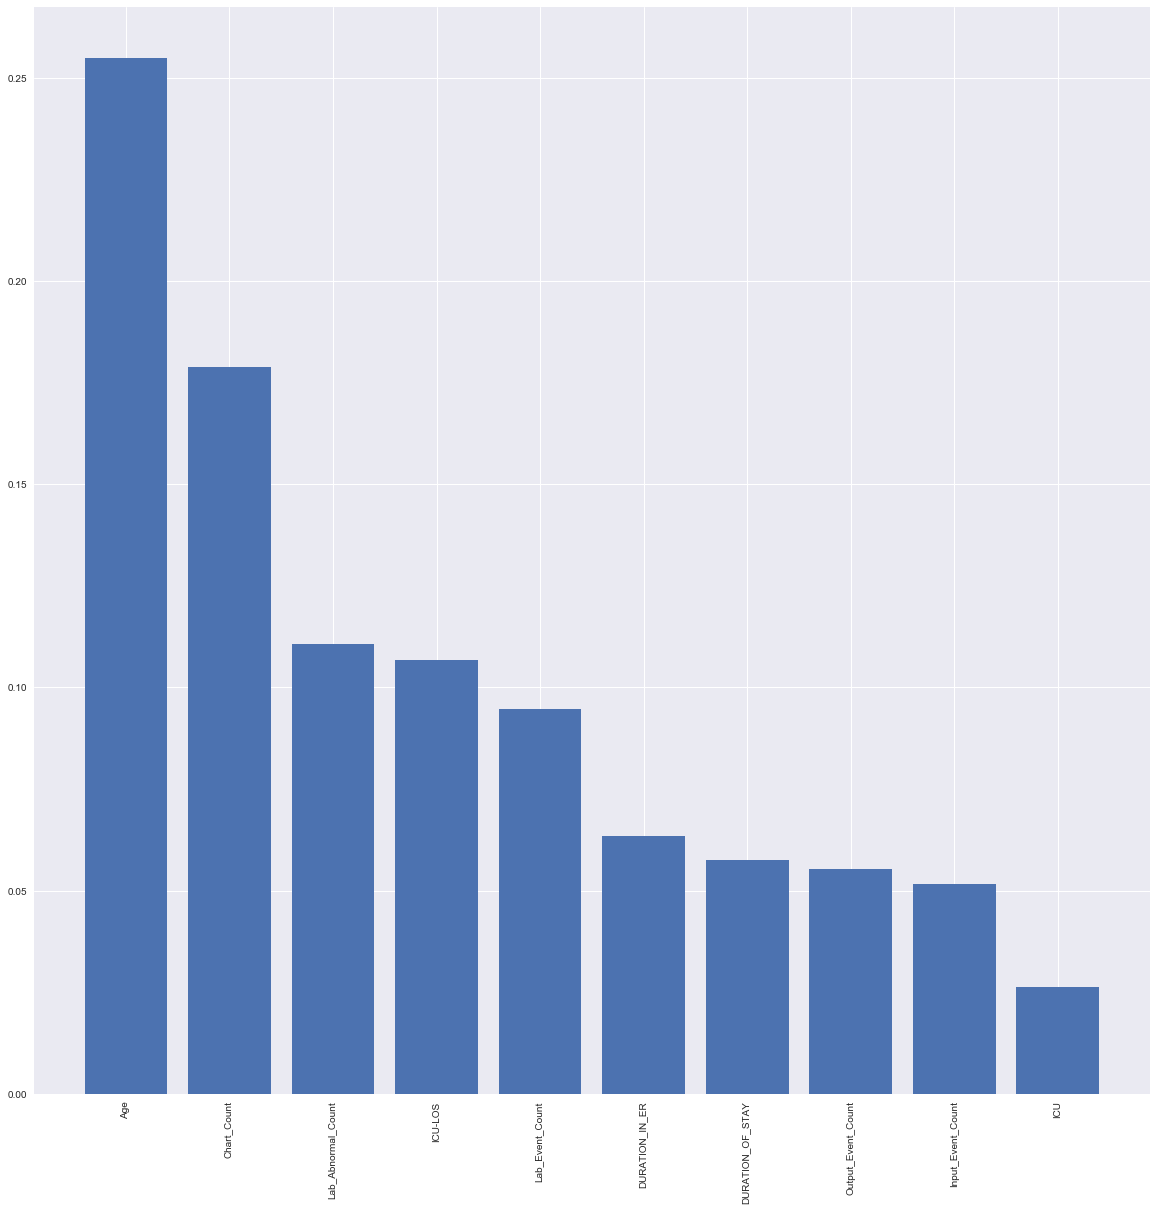

In [13]:
feature_importance_subdf = feature_importance_df[feature_importance_df[model_name].notnull()]
feature_importance_subdf = feature_importance_subdf.reset_index()
get_feature_importance(feature_importance_subdf[model_name], feature_importance_subdf['Features'])

### Top 20 Features

Random Forest Top 20 - Train Accuracy: 0.6716
Random Forest Top 20 - Train Precision: 0.3245
Random Forest Top 20 - Train Recall: 0.7957
Random Forest Top 20 - Train F1: 0.4610
Random Forest Top 20 - Train AUC: 0.8055


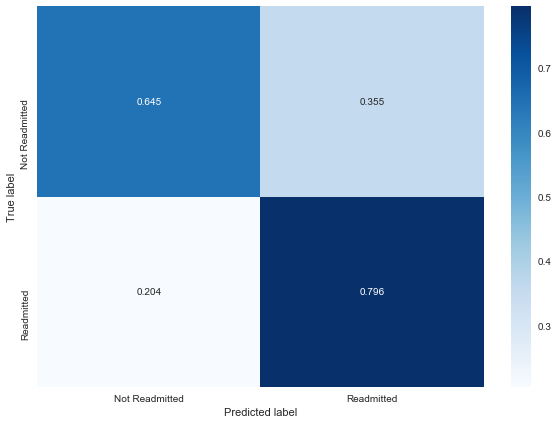

Random Forest Top 20 - Test Accuracy: 0.6542
Random Forest Top 20 - Test Precision: 0.3139
Random Forest Top 20 - Test Recall: 0.7547
Random Forest Top 20 - Test F1: 0.4433
Random Forest Top 20 - Test AUC: 0.7722


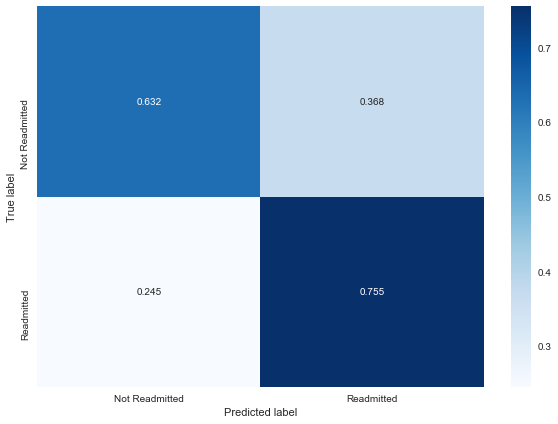

In [14]:
model_name = 'Random Forest Top 20'
scores_df = model_evaluation(train_predictions_df['READMISSION'],
                                    train_predictions_df[model_name + '_Train_Predictions'], train_predictions_df[model_name + '_Train_Probabilities'],
                                   model_name + ' - Train', scores_df)
scores_df = model_evaluation(test_predictions_df['READMISSION'],
                                    test_predictions_df[model_name + '_Test_Predictions'], test_predictions_df[model_name + '_Test_Probabilities'],
                                   model_name + ' - Test', scores_df)

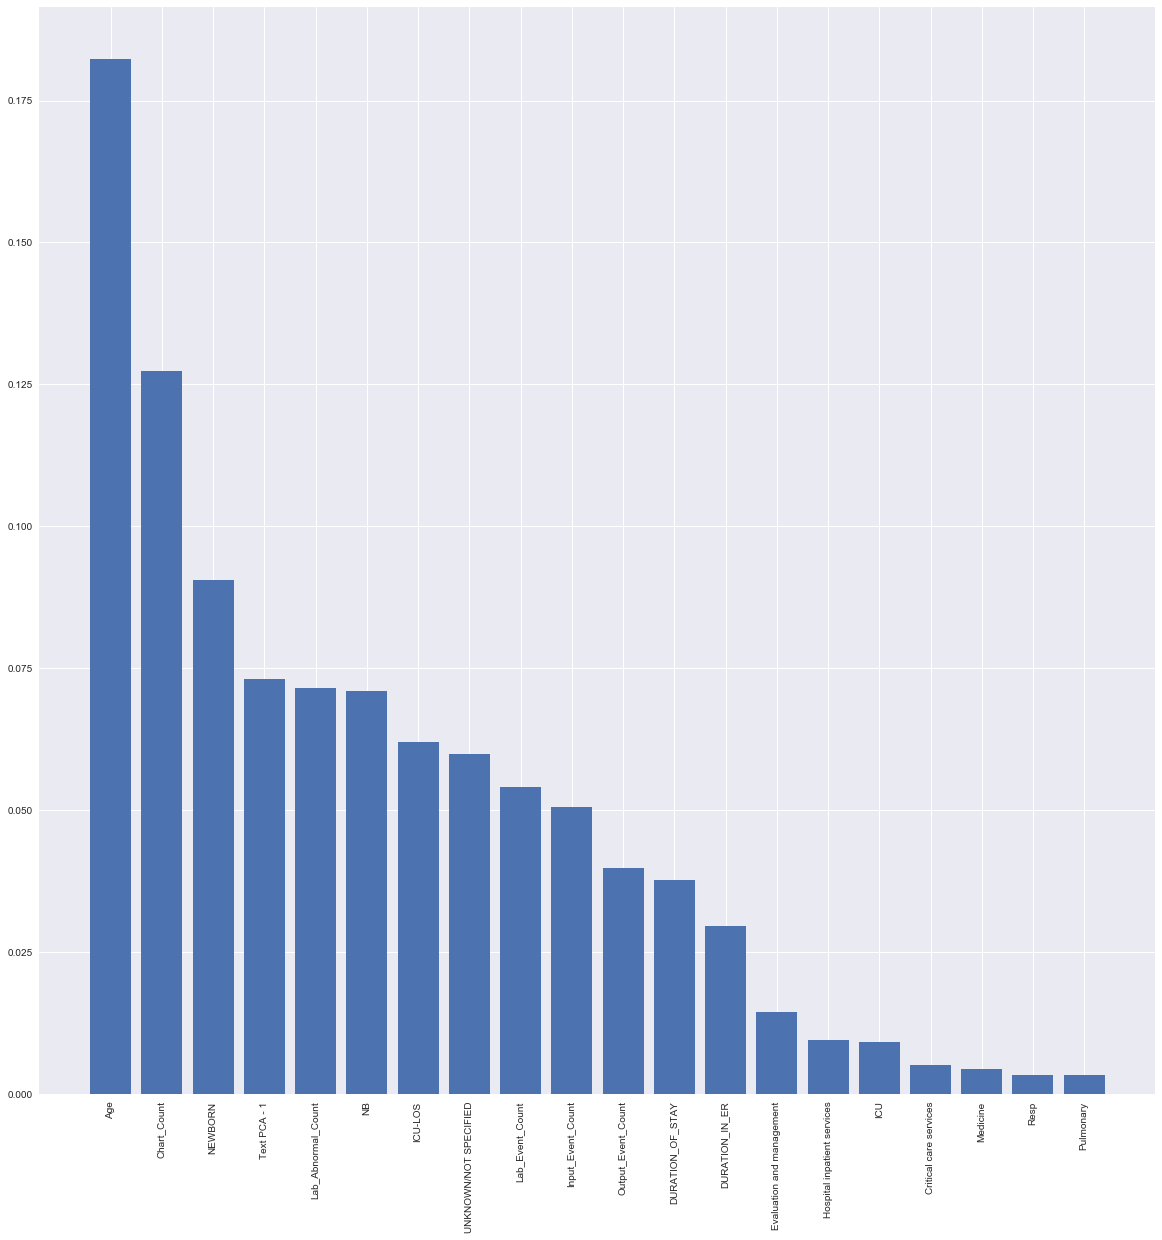

In [15]:
feature_importance_subdf = feature_importance_df[feature_importance_df[model_name].notnull()]
feature_importance_subdf = feature_importance_subdf.reset_index()
get_feature_importance(feature_importance_subdf[model_name], feature_importance_subdf['Features'])

### Top 30 Features

Random Forest Top 30 - Train Accuracy: 0.6688
Random Forest Top 30 - Train Precision: 0.3232
Random Forest Top 30 - Train Recall: 0.8012
Random Forest Top 30 - Train F1: 0.4606
Random Forest Top 30 - Train AUC: 0.8114


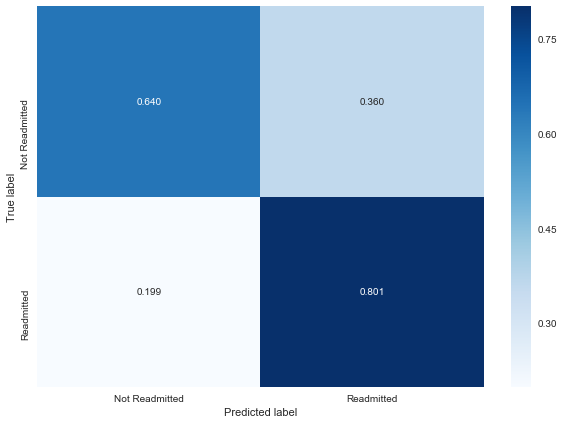

Random Forest Top 30 - Test Accuracy: 0.6544
Random Forest Top 30 - Test Precision: 0.3174
Random Forest Top 30 - Test Recall: 0.7768
Random Forest Top 30 - Test F1: 0.4507
Random Forest Top 30 - Test AUC: 0.7765


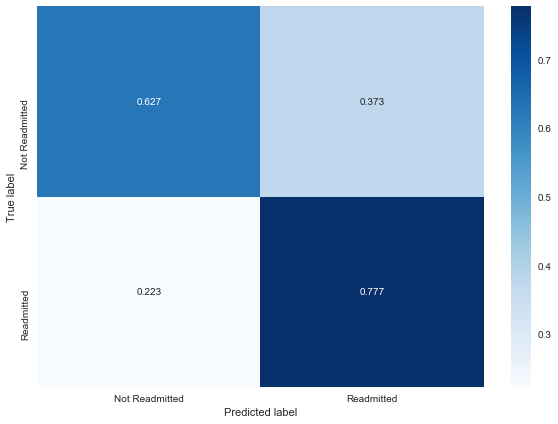

In [16]:
model_name = 'Random Forest Top 30'
scores_df = model_evaluation(train_predictions_df['READMISSION'],
                                    train_predictions_df[model_name + '_Train_Predictions'], train_predictions_df[model_name + '_Train_Probabilities'],
                                   model_name + ' - Train', scores_df)
scores_df = model_evaluation(test_predictions_df['READMISSION'],
                                    test_predictions_df[model_name + '_Test_Predictions'], test_predictions_df[model_name + '_Test_Probabilities'],
                                   model_name + ' - Test', scores_df)

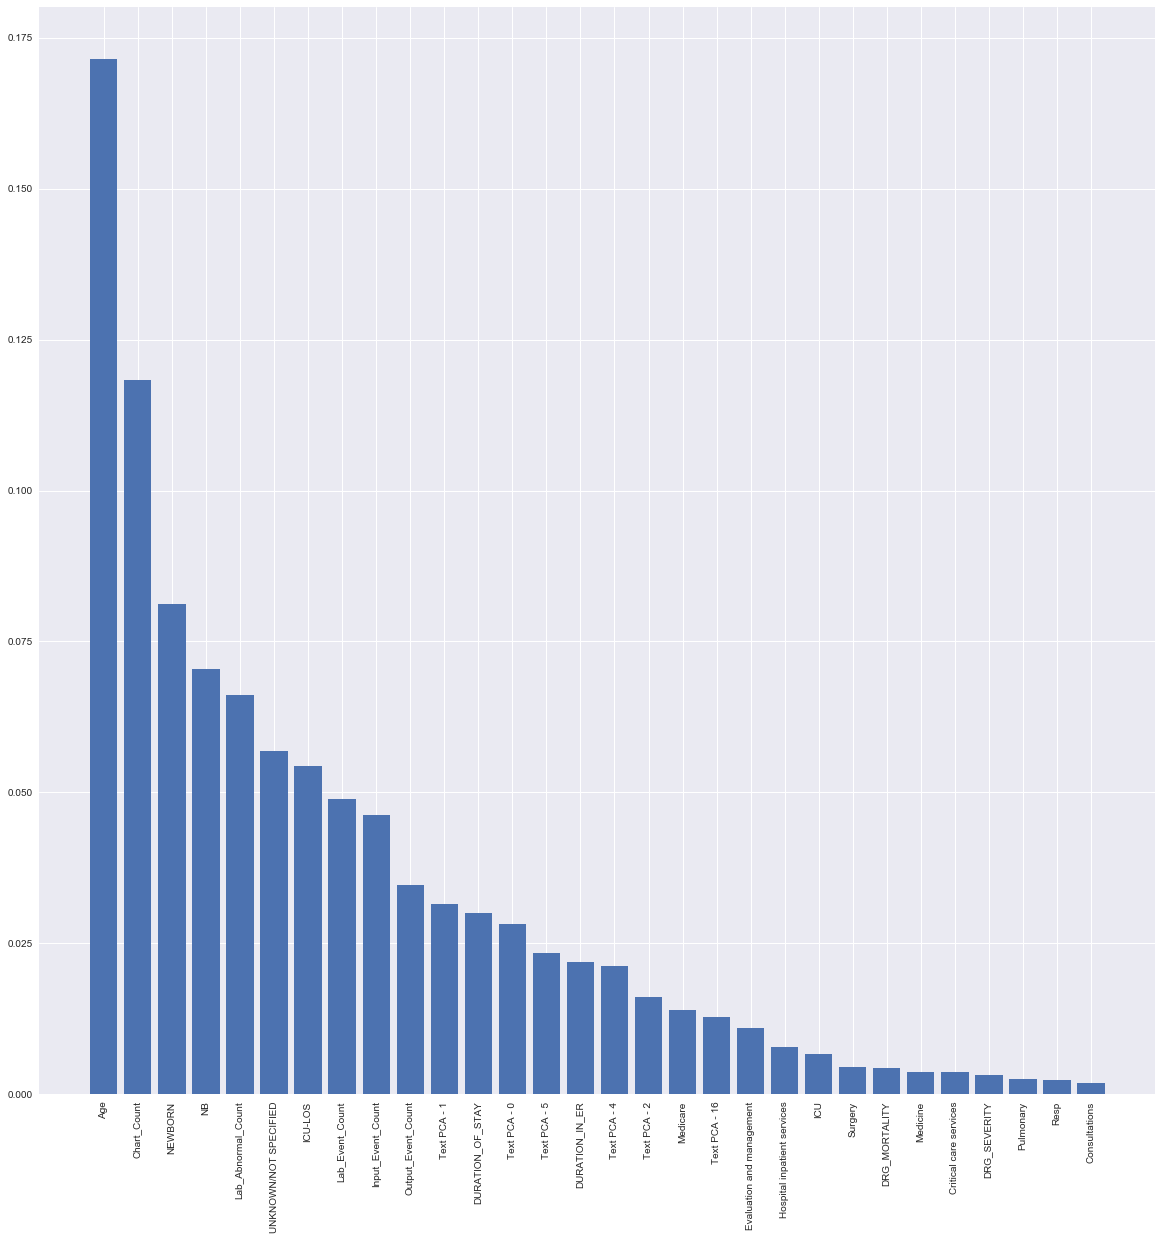

In [17]:
feature_importance_subdf = feature_importance_df[feature_importance_df[model_name].notnull()]
feature_importance_subdf = feature_importance_subdf.reset_index()
get_feature_importance(feature_importance_subdf[model_name], feature_importance_subdf['Features'])

### Random Forest Top 40

Random Forest Top 40 - Train Accuracy: 0.6735
Random Forest Top 40 - Train Precision: 0.3269
Random Forest Top 40 - Train Recall: 0.8024
Random Forest Top 40 - Train F1: 0.4645
Random Forest Top 40 - Train AUC: 0.8140


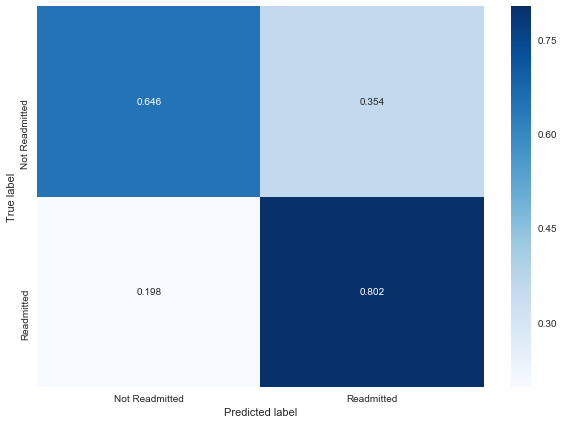

Random Forest Top 40 - Test Accuracy: 0.6538
Random Forest Top 40 - Test Precision: 0.3163
Random Forest Top 40 - Test Recall: 0.7723
Random Forest Top 40 - Test F1: 0.4488
Random Forest Top 40 - Test AUC: 0.7780


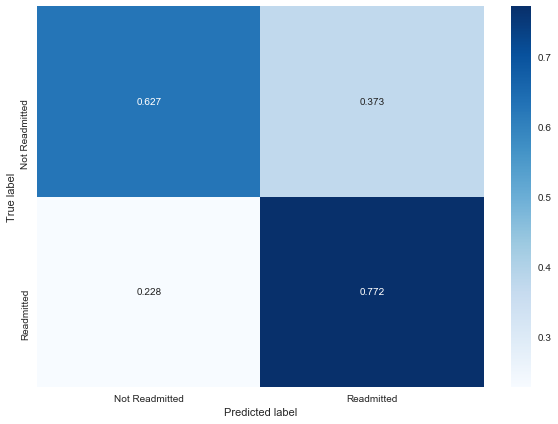

In [18]:
model_name = 'Random Forest Top 40'
scores_df = model_evaluation(train_predictions_df['READMISSION'],
                                    train_predictions_df[model_name + '_Train_Predictions'], train_predictions_df[model_name + '_Train_Probabilities'],
                                   model_name + ' - Train', scores_df)
scores_df = model_evaluation(test_predictions_df['READMISSION'],
                                    test_predictions_df[model_name + '_Test_Predictions'], test_predictions_df[model_name + '_Test_Probabilities'],
                                   model_name + ' - Test', scores_df)

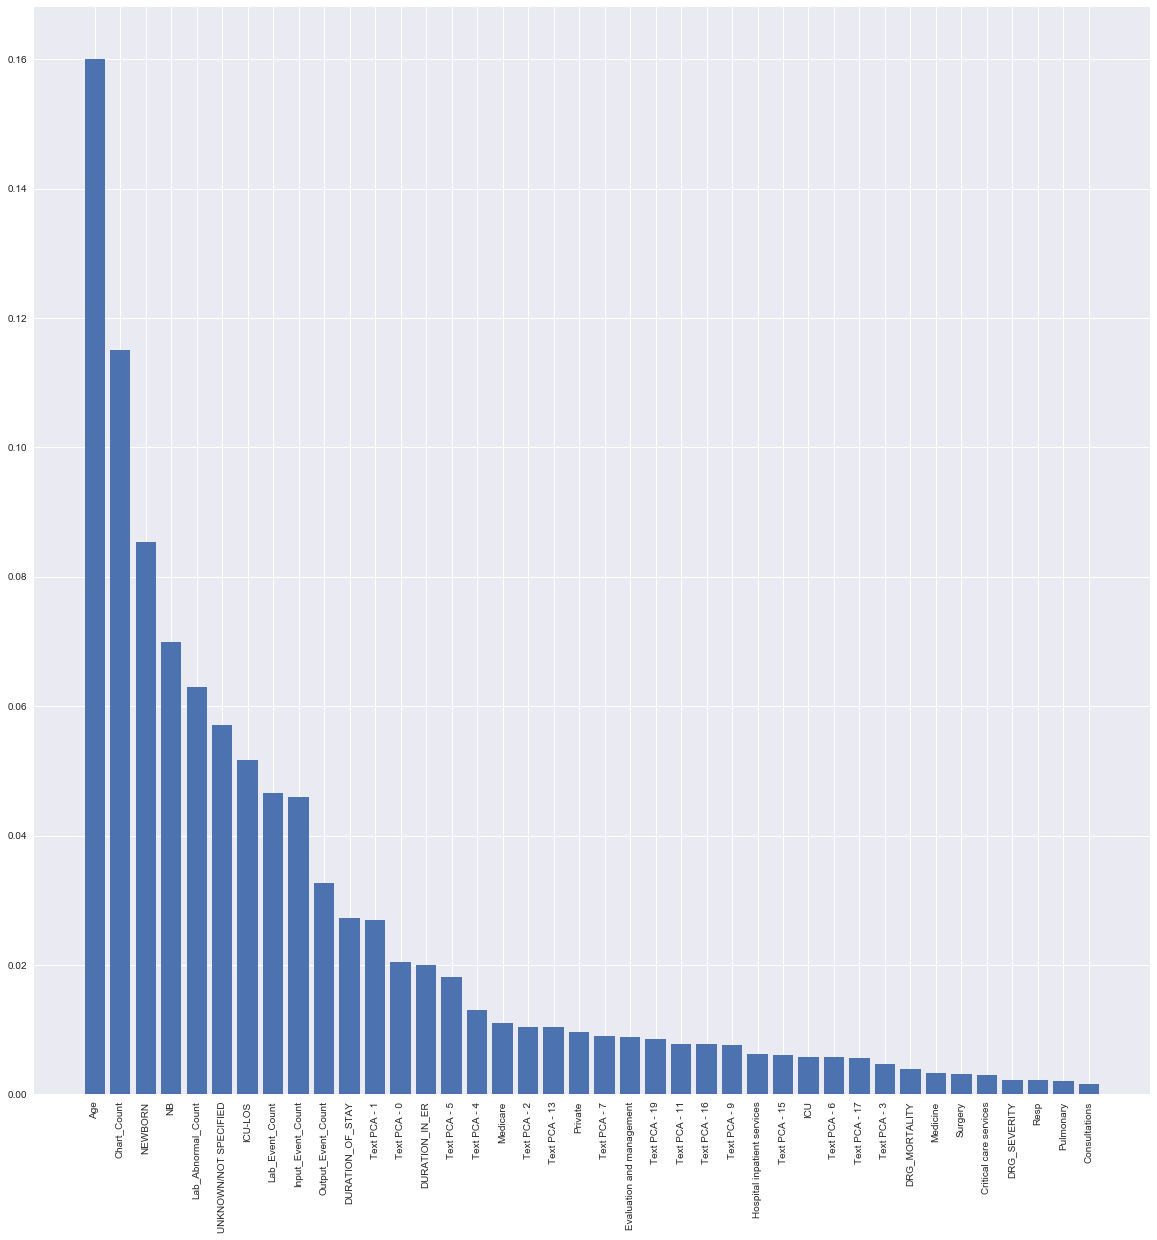

In [19]:
feature_importance_subdf = feature_importance_df[feature_importance_df[model_name].notnull()]
feature_importance_subdf = feature_importance_subdf.reset_index()
get_feature_importance(feature_importance_subdf[model_name], feature_importance_subdf['Features'])

### Random Forest Top 50

Random Forest Top 50 - Train Accuracy: 0.6865
Random Forest Top 50 - Train Precision: 0.3364
Random Forest Top 50 - Train Recall: 0.7982
Random Forest Top 50 - Train F1: 0.4733
Random Forest Top 50 - Train AUC: 0.8157


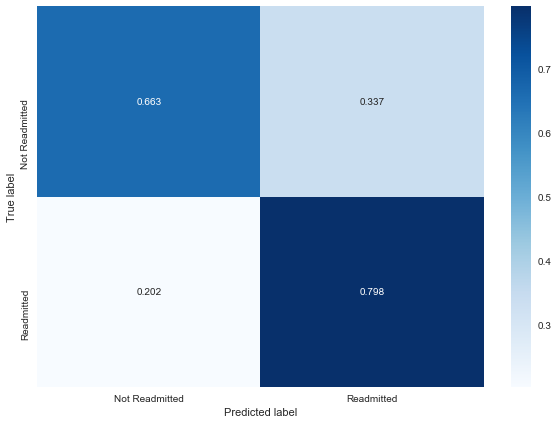

Random Forest Top 50 - Test Accuracy: 0.6654
Random Forest Top 50 - Test Precision: 0.3233
Random Forest Top 50 - Test Recall: 0.7625
Random Forest Top 50 - Test F1: 0.4541
Random Forest Top 50 - Test AUC: 0.7817


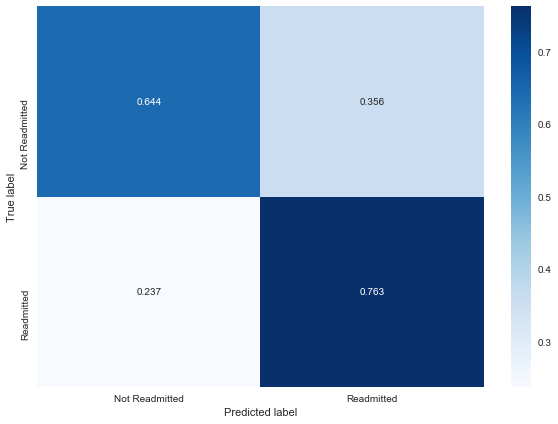

In [20]:
model_name = 'Random Forest Top 50'
scores_df = model_evaluation(train_predictions_df['READMISSION'],
                                    train_predictions_df[model_name + '_Train_Predictions'], train_predictions_df[model_name + '_Train_Probabilities'],
                                   model_name + ' - Train', scores_df)
scores_df = model_evaluation(test_predictions_df['READMISSION'],
                                    test_predictions_df[model_name + '_Test_Predictions'], test_predictions_df[model_name + '_Test_Probabilities'],
                                   model_name + ' - Test', scores_df)

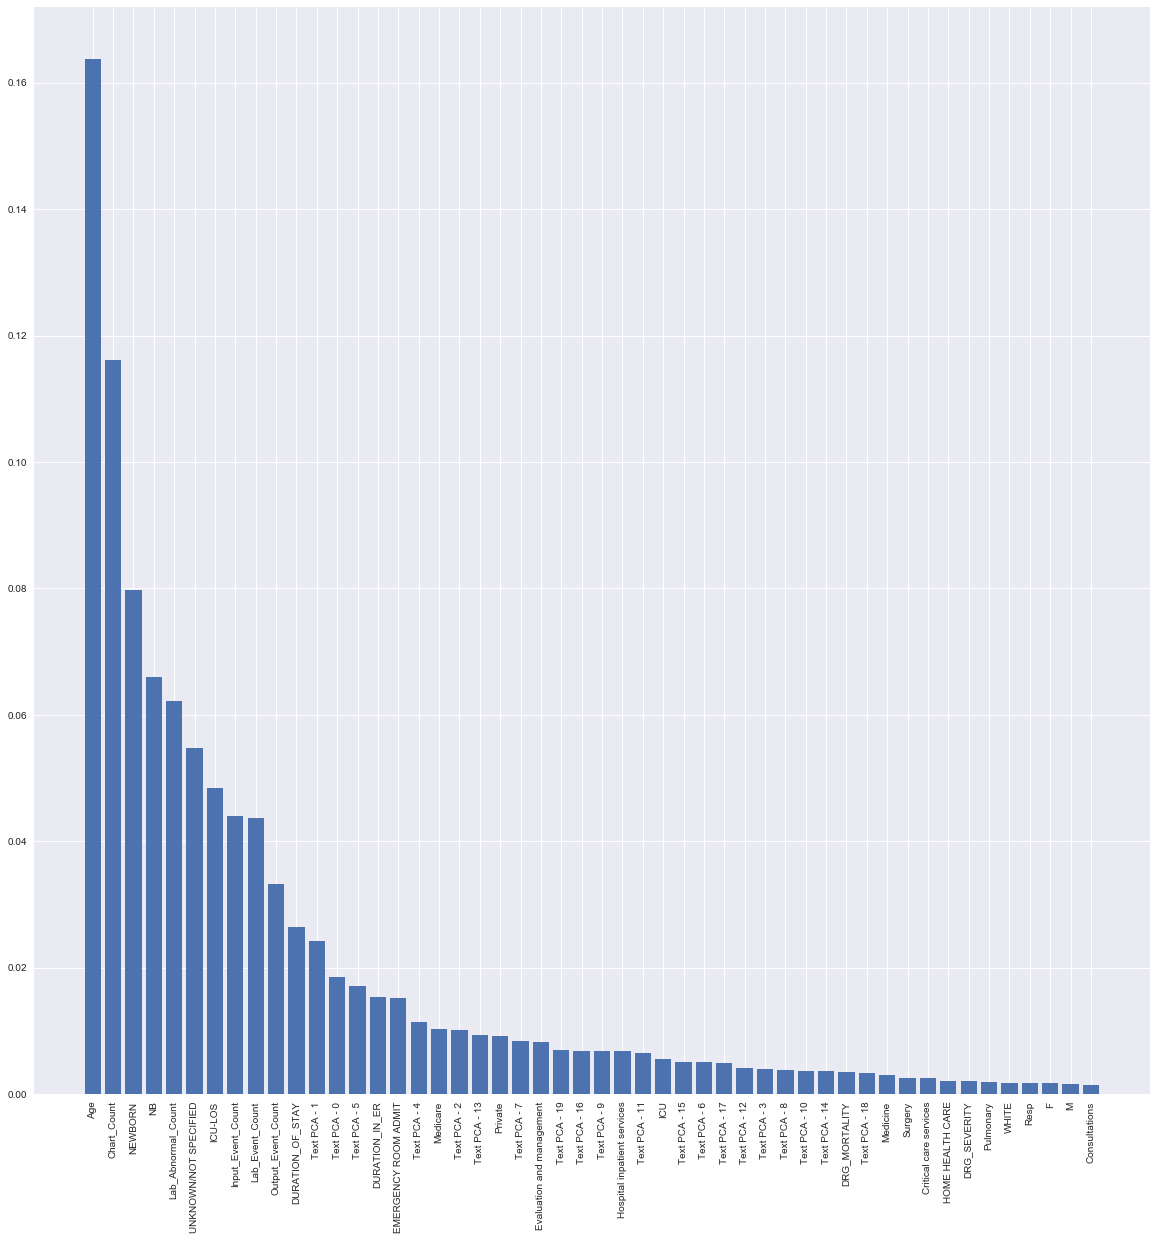

In [21]:
feature_importance_subdf = feature_importance_df[feature_importance_df[model_name].notnull()]
feature_importance_subdf = feature_importance_subdf.reset_index()
get_feature_importance(feature_importance_subdf[model_name], feature_importance_subdf['Features'])

### Random Forest Top 60

Random Forest Top 60 - Train Accuracy: 0.6902
Random Forest Top 60 - Train Precision: 0.3393
Random Forest Top 60 - Train Recall: 0.7973
Random Forest Top 60 - Train F1: 0.4760
Random Forest Top 60 - Train AUC: 0.8181


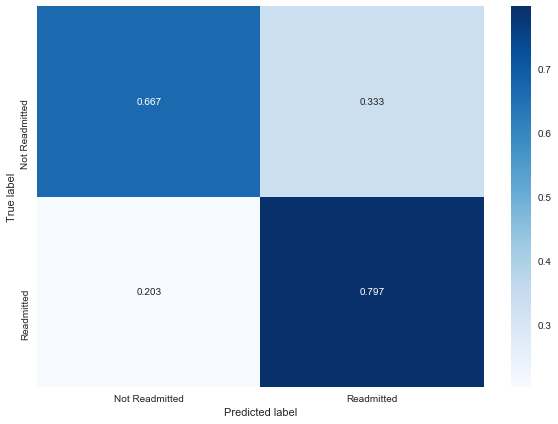

Random Forest Top 60 - Test Accuracy: 0.6703
Random Forest Top 60 - Test Precision: 0.3277
Random Forest Top 60 - Test Recall: 0.7671
Random Forest Top 60 - Test F1: 0.4592
Random Forest Top 60 - Test AUC: 0.7844


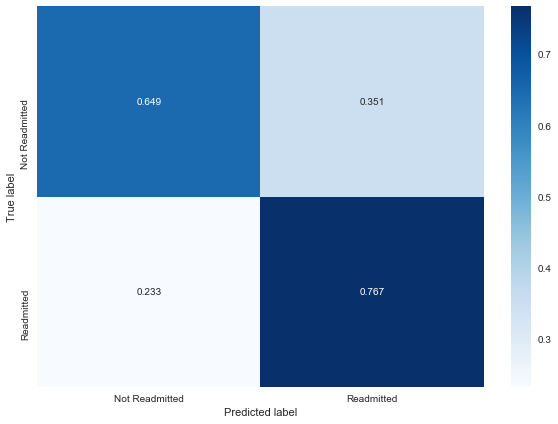

In [22]:
model_name = 'Random Forest Top 60'
scores_df = model_evaluation(train_predictions_df['READMISSION'],
                                    train_predictions_df[model_name + '_Train_Predictions'], train_predictions_df[model_name + '_Train_Probabilities'],
                                   model_name + ' - Train', scores_df)
scores_df = model_evaluation(test_predictions_df['READMISSION'],
                                    test_predictions_df[model_name + '_Test_Predictions'], test_predictions_df[model_name + '_Test_Probabilities'],
                                   model_name + ' - Test', scores_df)

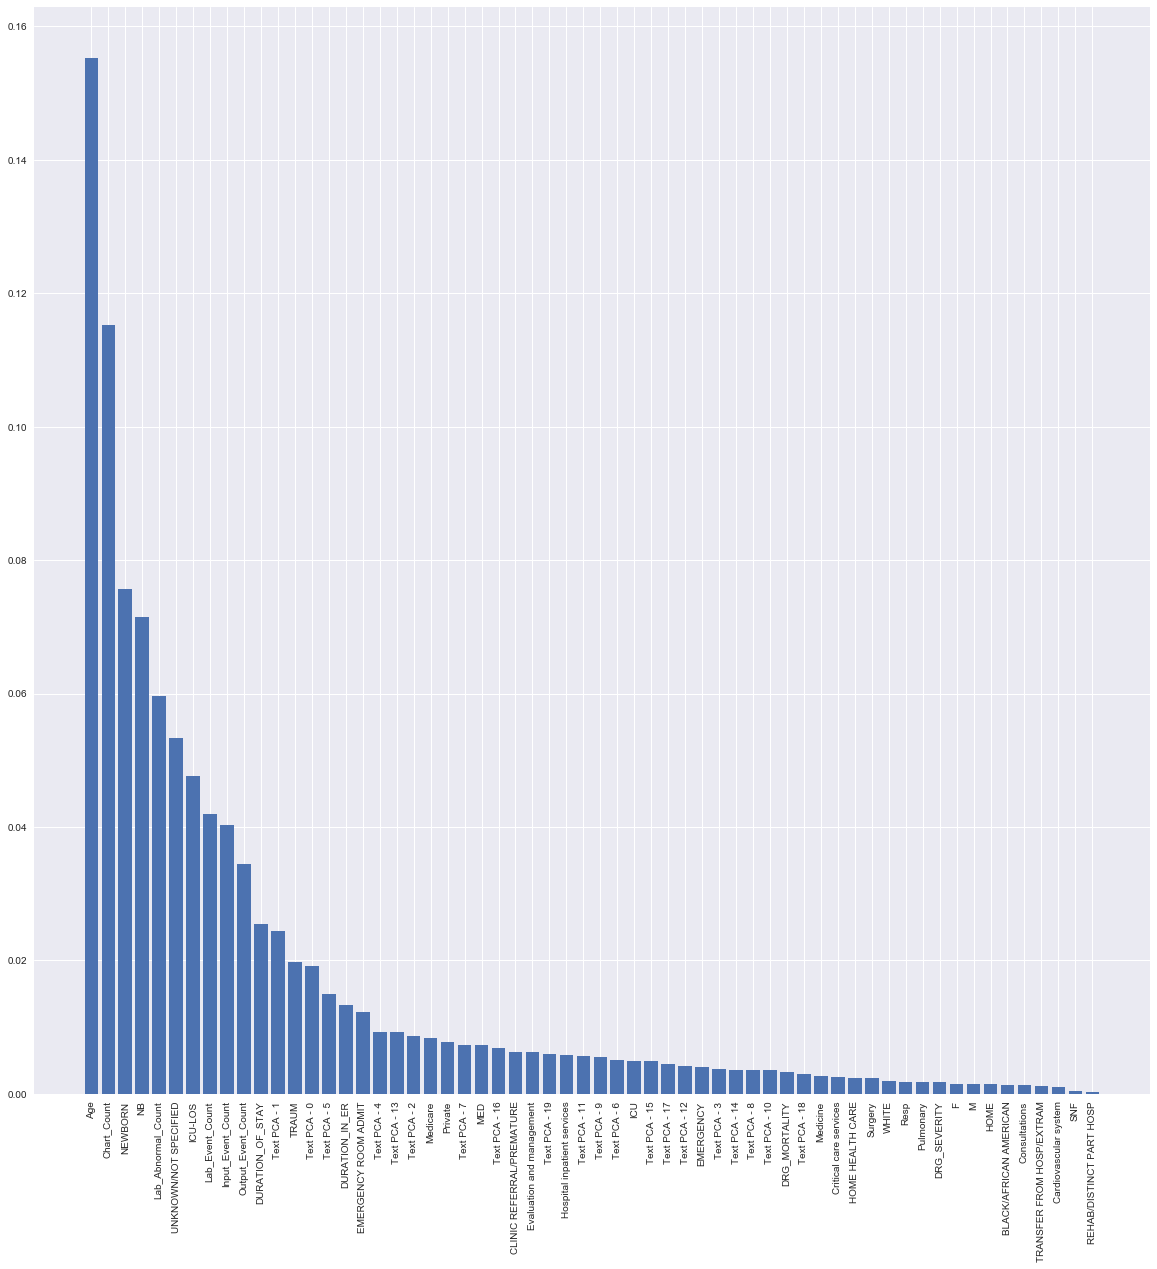

In [23]:
feature_importance_subdf = feature_importance_df[feature_importance_df[model_name].notnull()]
feature_importance_subdf = feature_importance_subdf.reset_index()
get_feature_importance(feature_importance_subdf[model_name], feature_importance_subdf['Features'])

### Random Forest Top 70

Random Forest Top 70 - Train Accuracy: 0.6908
Random Forest Top 70 - Train Precision: 0.3396
Random Forest Top 70 - Train Recall: 0.7965
Random Forest Top 70 - Train F1: 0.4762
Random Forest Top 70 - Train AUC: 0.8184


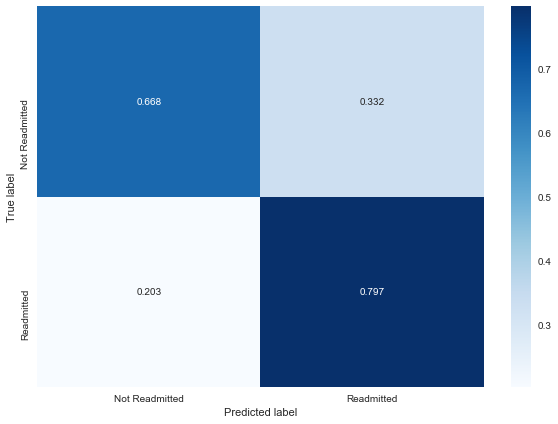

Random Forest Top 70 - Test Accuracy: 0.6688
Random Forest Top 70 - Test Precision: 0.3263
Random Forest Top 70 - Test Recall: 0.7658
Random Forest Top 70 - Test F1: 0.4576
Random Forest Top 70 - Test AUC: 0.7846


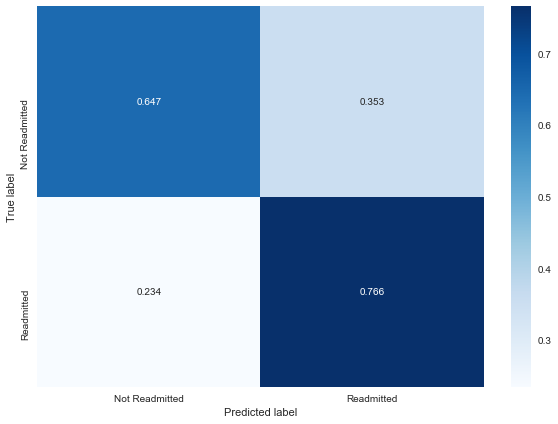

In [24]:
model_name = 'Random Forest Top 70'
scores_df = model_evaluation(train_predictions_df['READMISSION'],
                                    train_predictions_df[model_name + '_Train_Predictions'], train_predictions_df[model_name + '_Train_Probabilities'],
                                   model_name + ' - Train', scores_df)
scores_df = model_evaluation(test_predictions_df['READMISSION'],
                                    test_predictions_df[model_name + '_Test_Predictions'], test_predictions_df[model_name + '_Test_Probabilities'],
                                   model_name + ' - Test', scores_df)

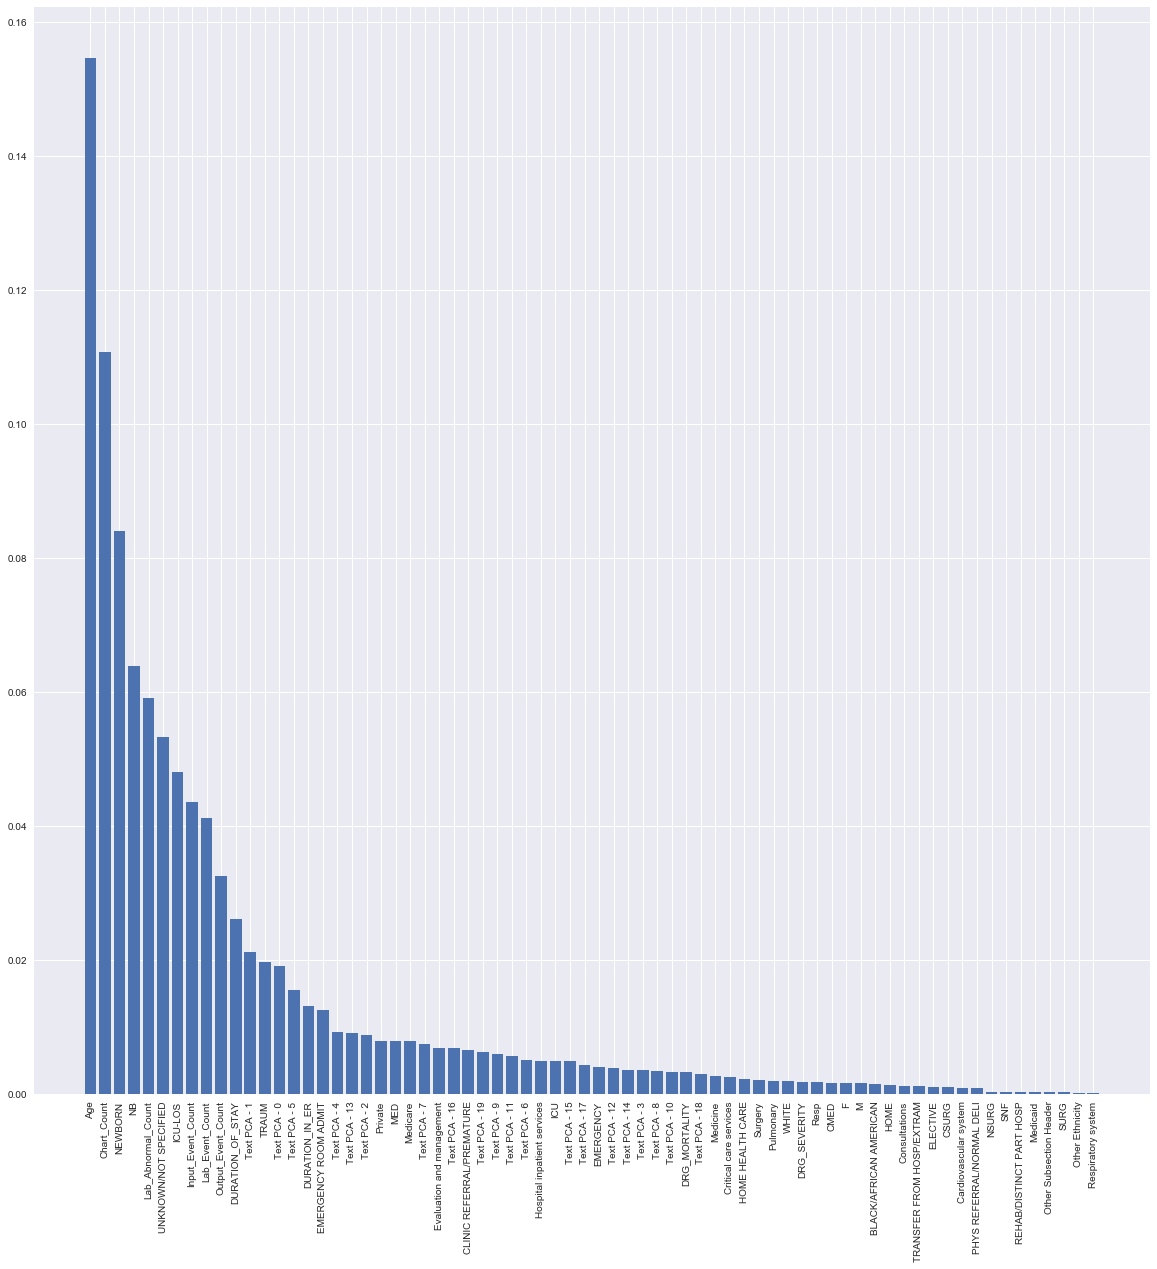

In [25]:
feature_importance_subdf = feature_importance_df[feature_importance_df[model_name].notnull()]
feature_importance_subdf = feature_importance_subdf.reset_index()
get_feature_importance(feature_importance_subdf[model_name], feature_importance_subdf['Features'])

### Random Forest Top 80

Random Forest Top 80 - Train Accuracy: 0.6904
Random Forest Top 80 - Train Precision: 0.3390
Random Forest Top 80 - Train Recall: 0.7943
Random Forest Top 80 - Train F1: 0.4752
Random Forest Top 80 - Train AUC: 0.8188


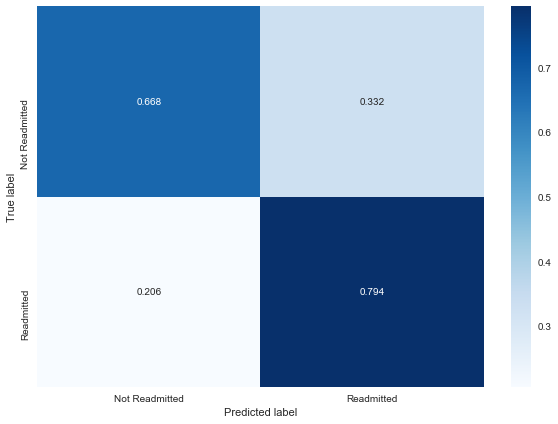

Random Forest Top 80 - Test Accuracy: 0.6702
Random Forest Top 80 - Test Precision: 0.3273
Random Forest Top 80 - Test Recall: 0.7651
Random Forest Top 80 - Test F1: 0.4585
Random Forest Top 80 - Test AUC: 0.7857


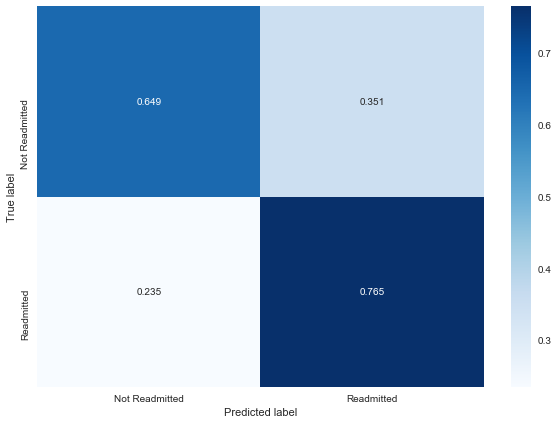

In [26]:
model_name = 'Random Forest Top 80'
scores_df = model_evaluation(train_predictions_df['READMISSION'],
                                    train_predictions_df[model_name + '_Train_Predictions'], train_predictions_df[model_name + '_Train_Probabilities'],
                                   model_name + ' - Train', scores_df)
scores_df = model_evaluation(test_predictions_df['READMISSION'],
                                    test_predictions_df[model_name + '_Test_Predictions'], test_predictions_df[model_name + '_Test_Probabilities'],
                                   model_name + ' - Test', scores_df)

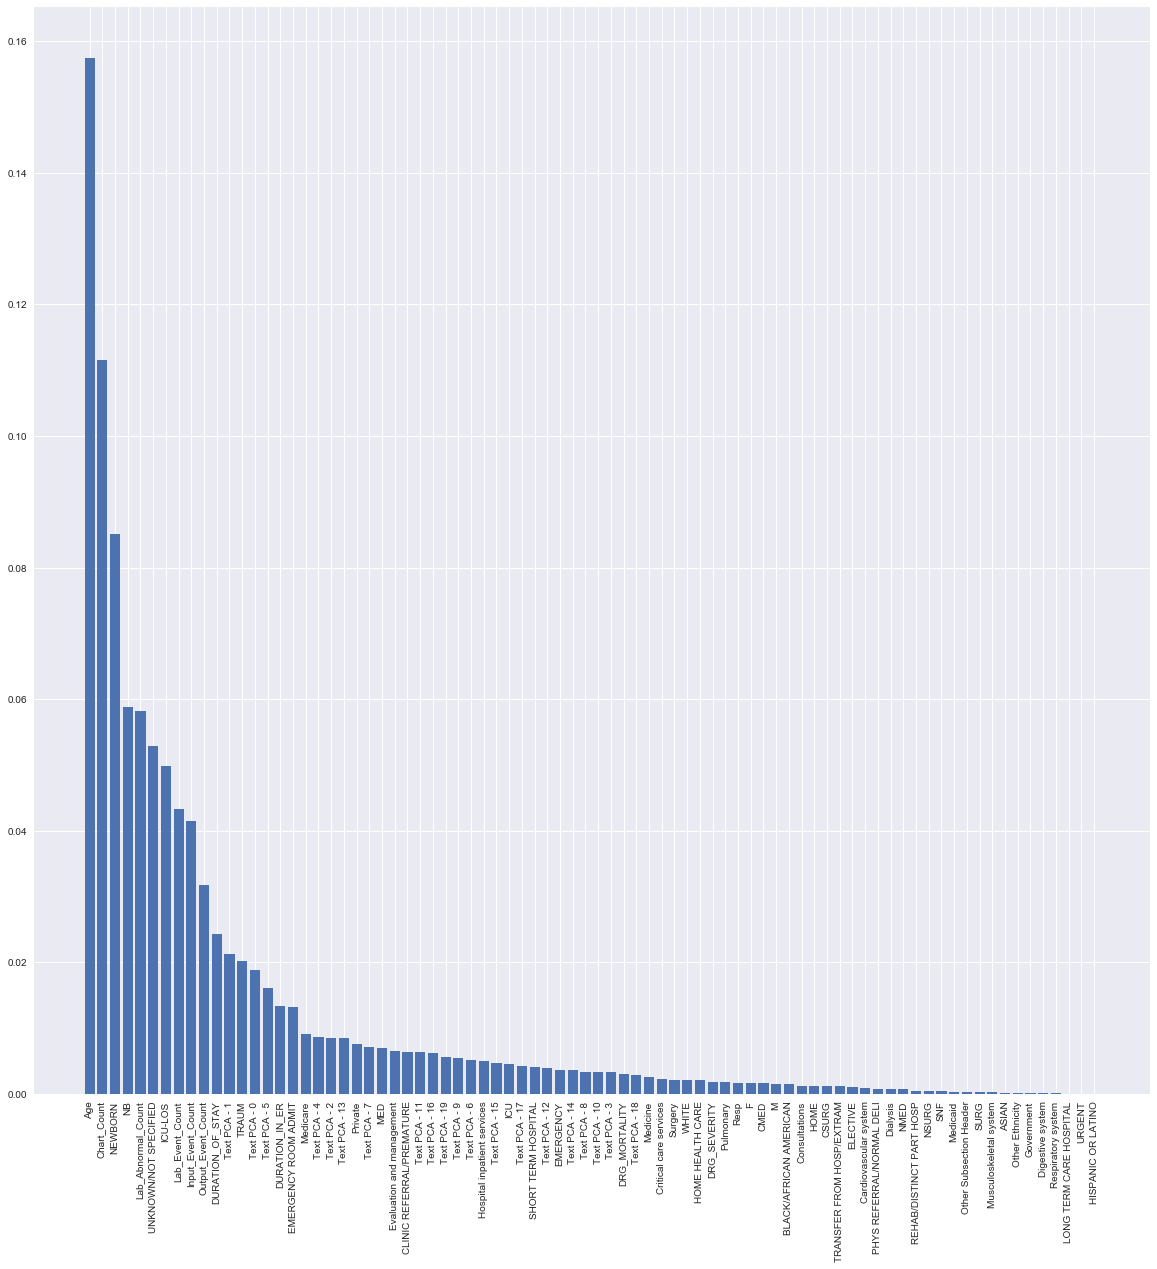

In [27]:
feature_importance_subdf = feature_importance_df[feature_importance_df[model_name].notnull()]
feature_importance_subdf = feature_importance_subdf.reset_index()
get_feature_importance(feature_importance_subdf[model_name], feature_importance_subdf['Features'])

### Random Forest Top 90

Random Forest Top 90 - Train Accuracy: 0.8705
Random Forest Top 90 - Train Precision: 0.5908
Random Forest Top 90 - Train Recall: 0.8663
Random Forest Top 90 - Train F1: 0.7025
Random Forest Top 90 - Train AUC: 0.9435


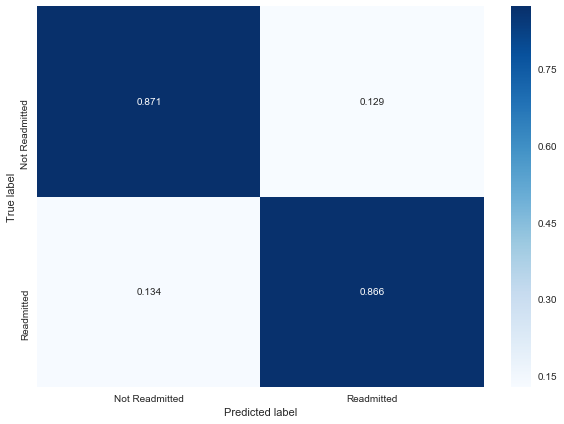

Random Forest Top 90 - Test Accuracy: 0.7678
Random Forest Top 90 - Test Precision: 0.4032
Random Forest Top 90 - Test Recall: 0.5680
Random Forest Top 90 - Test F1: 0.4716
Random Forest Top 90 - Test AUC: 0.7898


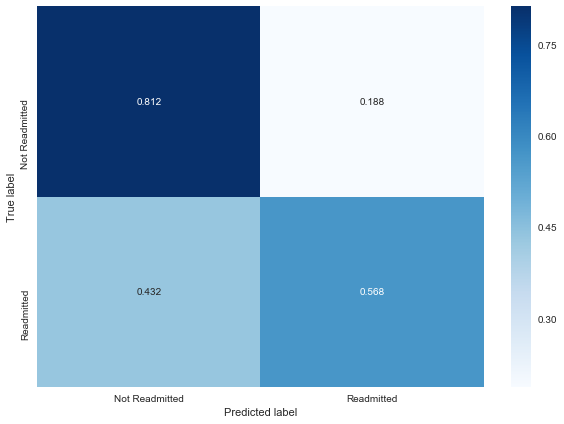

In [28]:
model_name = 'Random Forest Top 90'
scores_df = model_evaluation(train_predictions_df['READMISSION'],
                                    train_predictions_df[model_name + '_Train_Predictions'], train_predictions_df[model_name + '_Train_Probabilities'],
                                   model_name + ' - Train', scores_df)
scores_df = model_evaluation(test_predictions_df['READMISSION'],
                                    test_predictions_df[model_name + '_Test_Predictions'], test_predictions_df[model_name + '_Test_Probabilities'],
                                   model_name + ' - Test', scores_df)

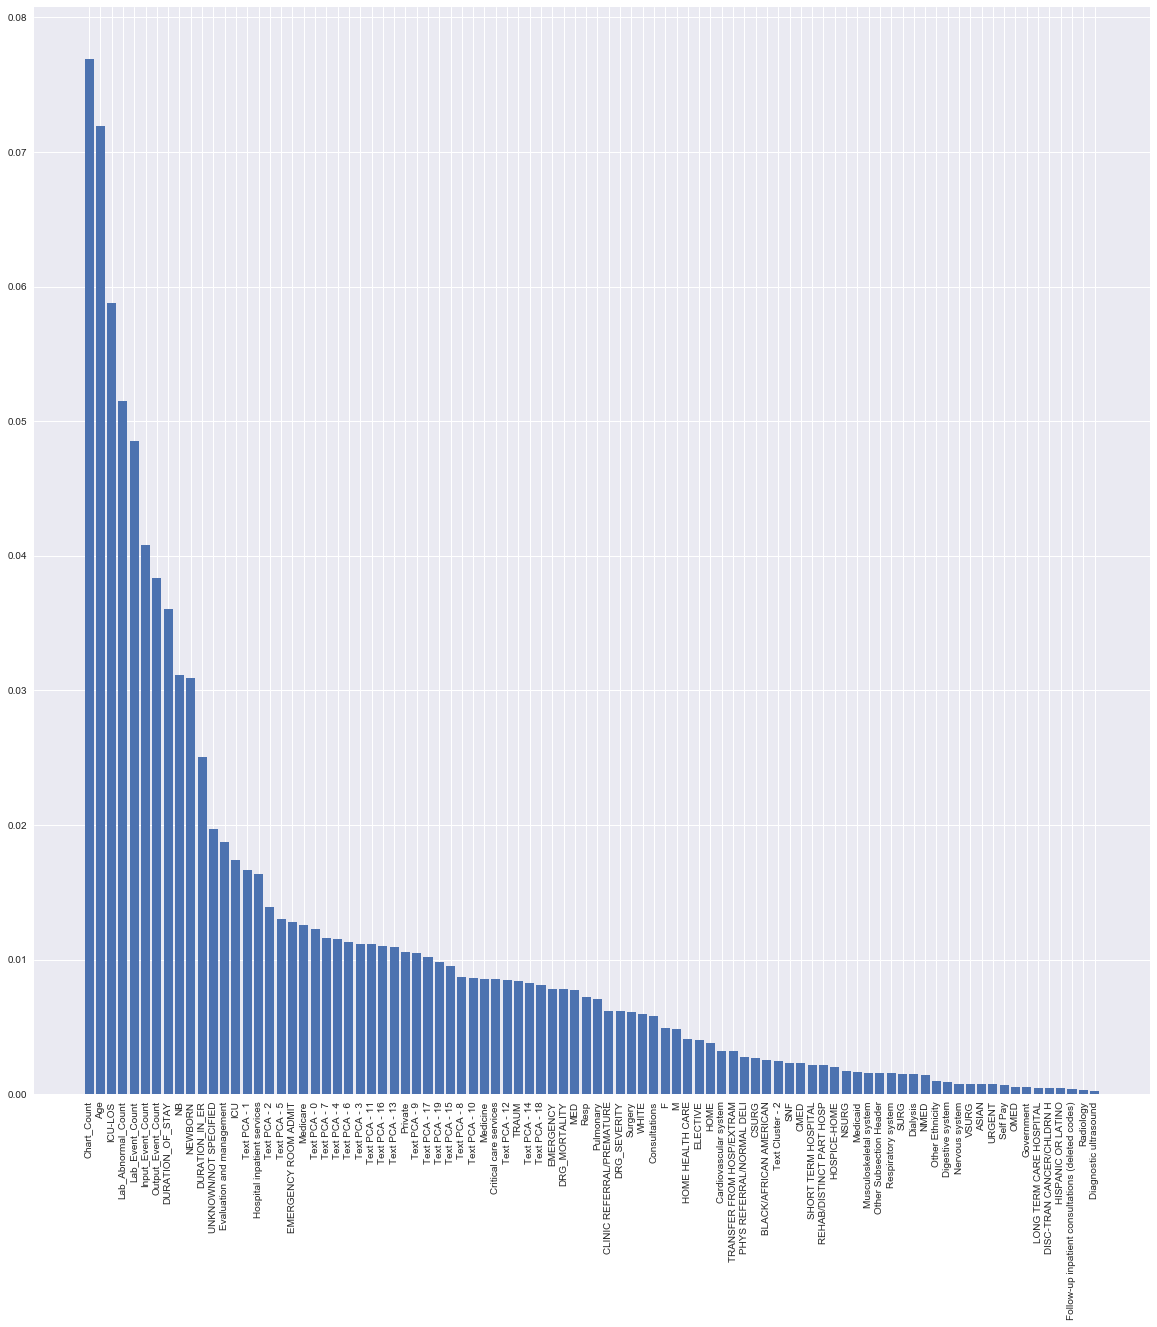

In [29]:
feature_importance_subdf = feature_importance_df[feature_importance_df[model_name].notnull()]
feature_importance_subdf = feature_importance_subdf.reset_index()
get_feature_importance(feature_importance_subdf[model_name], feature_importance_subdf['Features'])

### Random Forest Top 100

In [ ]:
model_name = 'Random Forest Top 100'
scores_df = model_evaluation(train_predictions_df['READMISSION'],
                                    train_predictions_df[model_name + '_Train_Predictions'], train_predictions_df[model_name + '_Train_Probabilities'],
                                   model_name + ' - Train', scores_df)
scores_df = model_evaluation(test_predictions_df['READMISSION'],
                                    test_predictions_df[model_name + '_Test_Predictions'], test_predictions_df[model_name + '_Test_Probabilities'],
                                   model_name + ' - Test', scores_df)

In [ ]:
feature_importance_subdf = feature_importance_df[feature_importance_df[model_name].notnull()]
feature_importance_subdf = feature_importance_subdf.reset_index()
get_feature_importance(feature_importance_subdf[model_name], feature_importance_subdf['Features'])

## XGBoost

XGBoost - Train Accuracy: 0.8431
XGBoost - Train Precision: 0.9557
XGBoost - Train Recall: 0.1162
XGBoost - Train F1: 0.2072
XGBoost - Train AUC: 0.7909


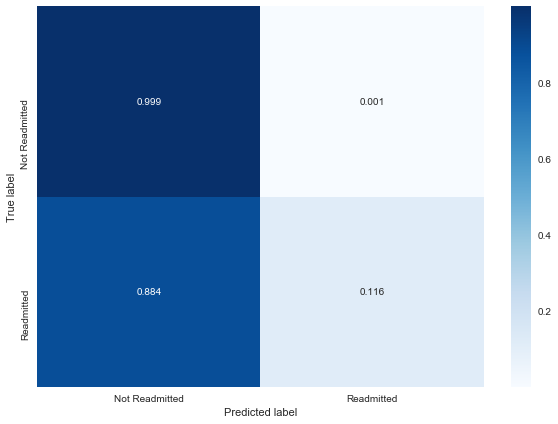

XGBoost - Test Accuracy: 0.8377
XGBoost - Test Precision: 0.9670
XGBoost - Test Recall: 0.1145
XGBoost - Test F1: 0.2048
XGBoost - Test AUC: 0.7888


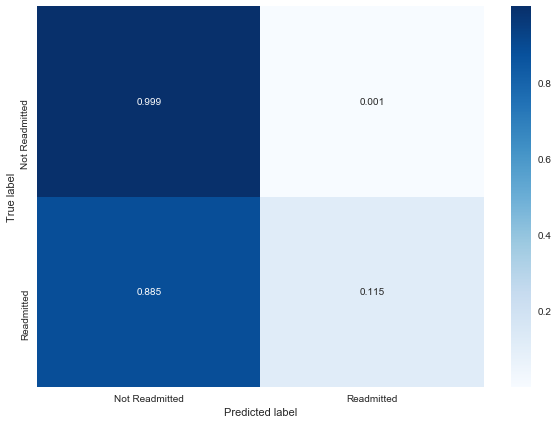

In [30]:
model_name = 'XGBoost'
scores_df = model_evaluation(train_predictions_df['READMISSION'],
                                    train_predictions_df[model_name + '_Train_Predictions'], train_predictions_df[model_name + '_Train_Probabilities'],
                                   model_name + ' - Train', scores_df)
scores_df = model_evaluation(test_predictions_df['READMISSION'],
                                    test_predictions_df[model_name + '_Test_Predictions'], test_predictions_df[model_name + '_Test_Probabilities'],
                                   model_name + ' - Test', scores_df)

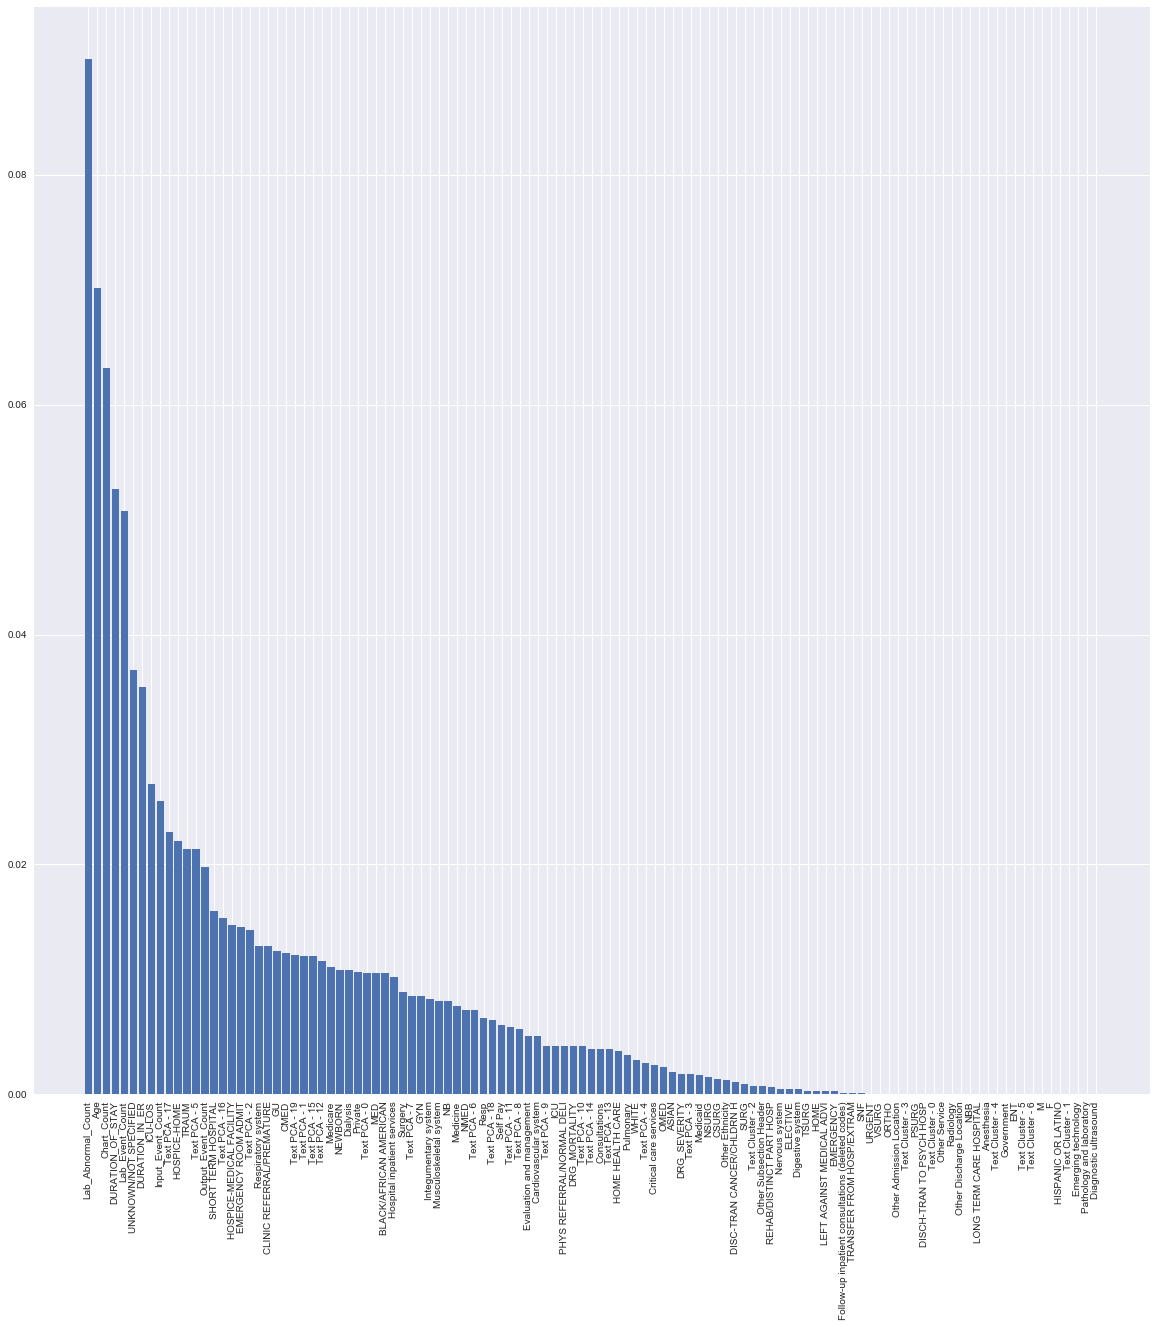

In [31]:
get_feature_importance(feature_importance_df[model_name], feature_importance_df['Features'])

## SVM

## All Models

In [32]:
scores_df['TrainTestFlag'] = scores_df['Model'].apply(lambda x: 'Train' if 'Train' in x else 'Test')
scores_df['Model'] = scores_df['Model'].apply(lambda x: x.replace(' - Train', ''))
scores_df['Model'] = scores_df['Model'].apply(lambda x: x.replace(' - Test', ''))
scores_df_train = scores_df[scores_df['TrainTestFlag'] == 'Train'].drop('TrainTestFlag', axis = 1)
scores_df_test = scores_df[scores_df['TrainTestFlag'] == 'Test'].drop('TrainTestFlag', axis = 1)

### Training Scores

In [33]:
scores_df_train.sort_values('AUC', ascending = False)

,Model,Accuracy,Precision,Recall,F1,AUC
0,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
0,Random Forest Top 90,0.870533,0.590847,0.866297,0.702537,0.943523
0,Random Forest Top 80,0.690372,0.339004,0.794316,0.475199,0.818765
0,Random Forest Top 70,0.690787,0.339644,0.796502,0.476219,0.818392
0,Random Forest Top 60,0.690194,0.339273,0.797343,0.476004,0.818146
0,Random Forest Top 50,0.686483,0.336381,0.798184,0.473298,0.815697
0,Random Forest Top 40,0.673513,0.326870,0.802388,0.464512,0.813961
0,Random Forest Top 30,0.668823,0.323202,0.801211,0.460601,0.811429
0,Random Forest Top 10,0.698860,0.336321,0.725698,0.459629,0.807824
0,Random Forest Top 20,0.671584,0.324463,0.795661,0.460954,0.805465


### Testing Scores

In [34]:
scores_df_test.sort_values('AUC', ascending = False)

,Model,Accuracy,Precision,Recall,F1,AUC
0,Random Forest Top 90,0.767779,0.403233,0.567990,0.471637,0.789782
0,XGBoost,0.837706,0.967033,0.114509,0.204770,0.788757
0,Random Forest,0.836400,0.876777,0.120364,0.211670,0.787524
0,Random Forest Top 80,0.670189,0.327303,0.765127,0.458480,0.785689
0,Random Forest Top 70,0.668764,0.326310,0.765777,0.457621,0.784628
0,Random Forest Top 60,0.670307,0.327682,0.767079,0.459202,0.784362
0,Random Forest Top 50,0.665440,0.323310,0.762524,0.454088,0.781664
0,Random Forest Top 40,0.653805,0.316280,0.772284,0.448771,0.777996
0,Random Forest Top 30,0.654399,0.317384,0.776838,0.450651,0.776484
0,Random Forest Top 20,0.654161,0.313853,0.754717,0.443340,0.772249


### AUC

In [35]:
def plot_roc(y, predictions, label):
    plt.figure(figsize=(20,20))
    
    models = [column for column in predictions.columns if 'Blind' not in column]
    # Compute fpr, tpr, thresholds and roc auc
    for model in models:
        prediction = predictions[model]
        fpr, tpr, thresholds = roc_curve(y, prediction)
        roc_auc = auc(fpr, tpr)
        # Plot ROC curve
        plt.plot(fpr, tpr, label=model + ' ROC curve (area = %0.3f)' % roc_auc)
        
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('{0} ROC Curves'.format(label))
    plt.legend(loc="lower right")

    plt.show()

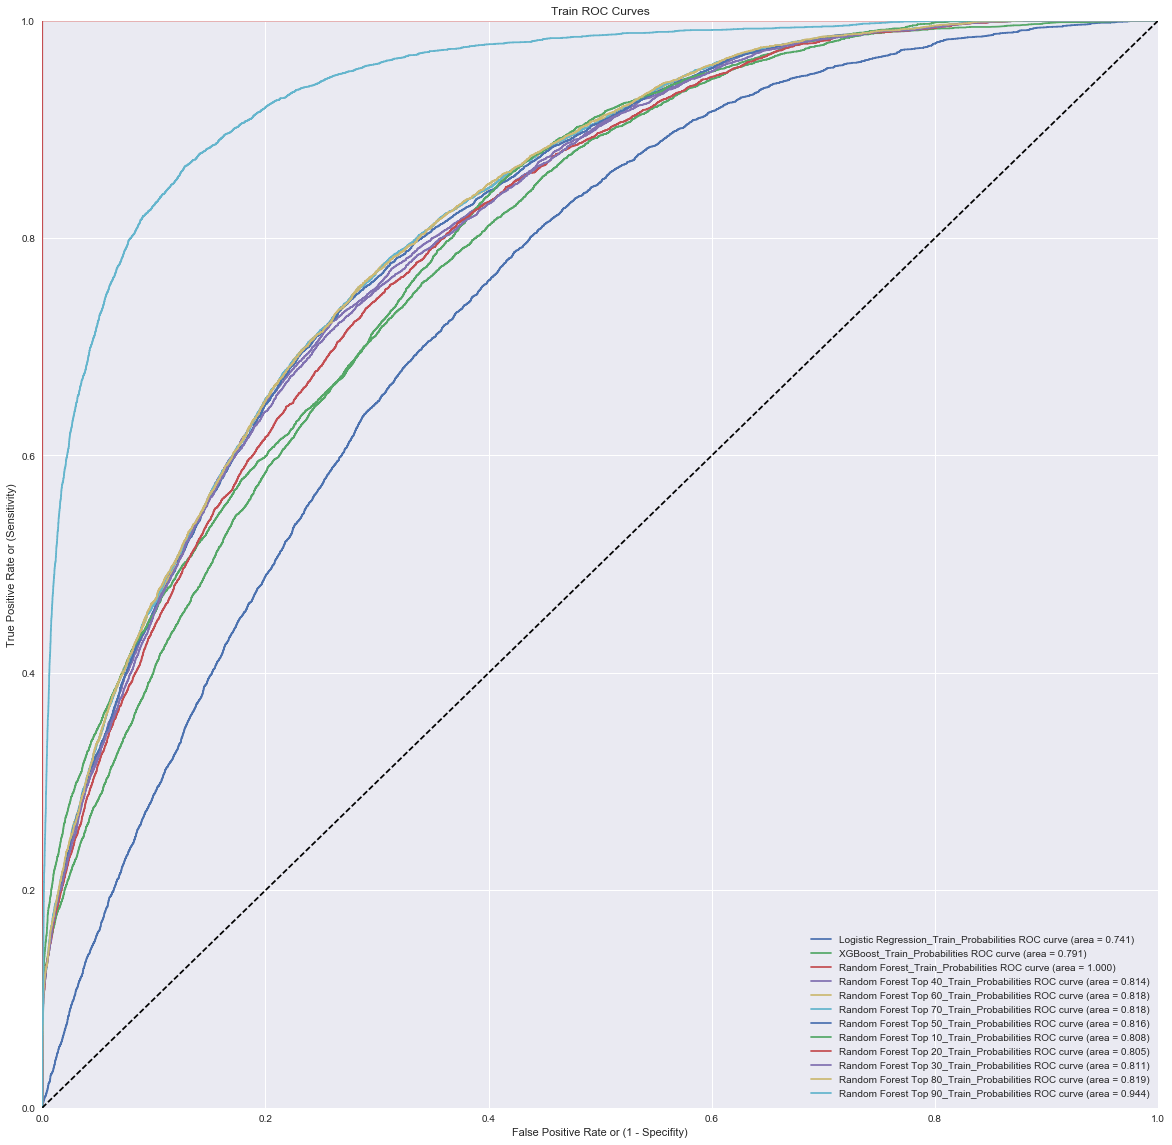

In [36]:
train_probability_columns = [column for column in train_predictions_df.columns if 'Probabilities' in column]
plot_roc(train_predictions_df['READMISSION'], train_predictions_df[train_probability_columns], 'Train')

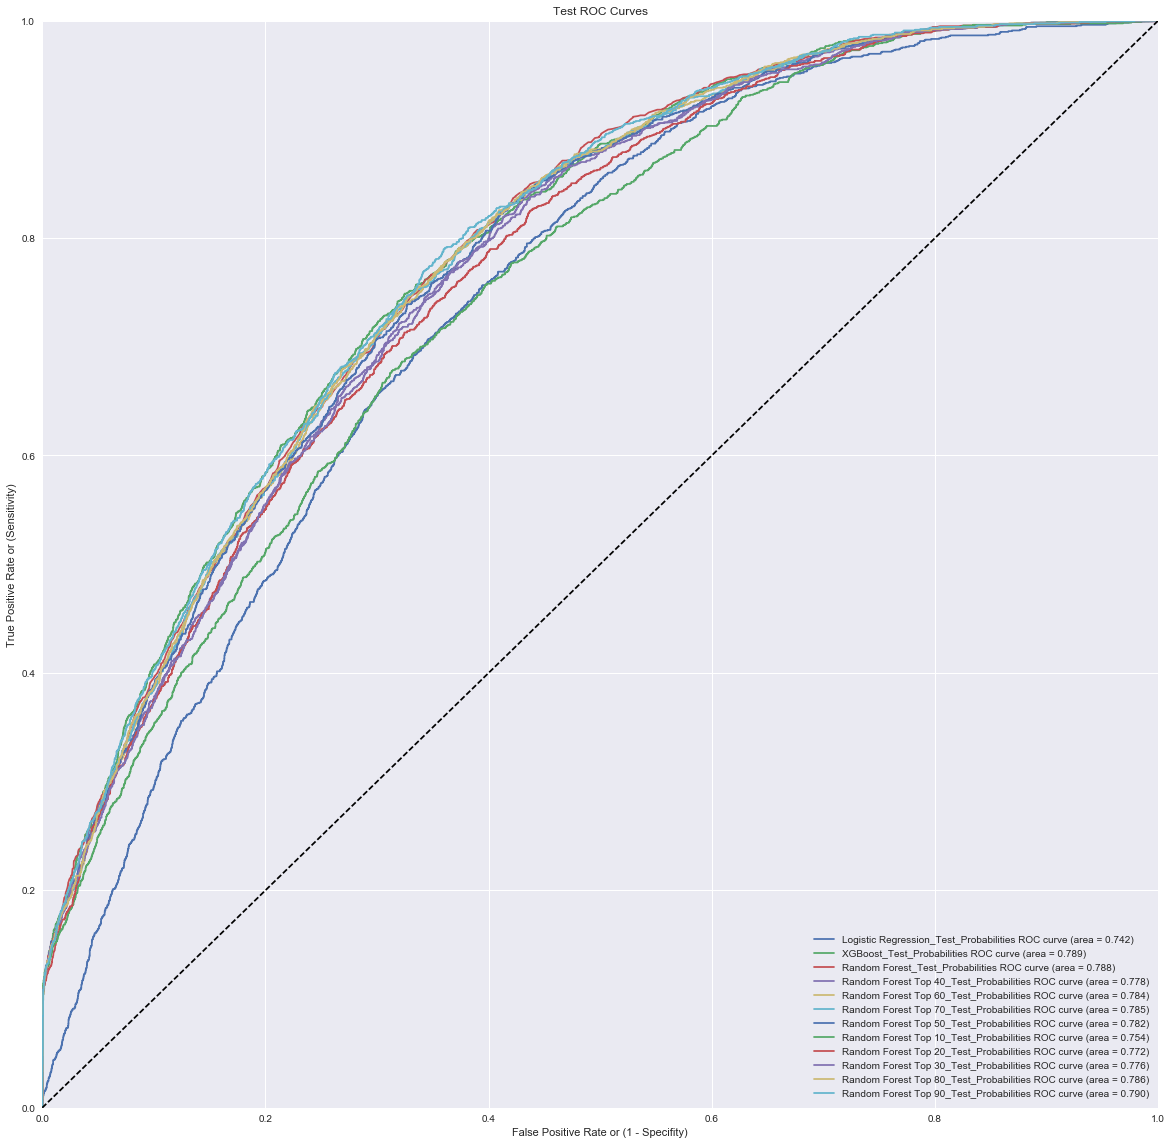

In [37]:
test_probability_columns = [column for column in test_predictions_df.columns if 'Probabilities' in column]
plot_roc(test_predictions_df['READMISSION'], test_predictions_df[test_probability_columns], 'Test')

### Cost Effectiveness

In [38]:
def plot_cost_effectiveness(cost_df, predictions, label):
    plt.figure(figsize=(20,20))

    

        
        ls = '--' if 'Blind' in model else '-'
        plot_title = '{0} Costs | min = ${1:,.0f}'.format(model, min(costs))
        plt.plot(PROBABILITY_THRESHOLDS, costs, label = plot_title, ls = ls)
    
    plt.xlabel('Probability Threshold (%)')
    plt.ylabel('Program Cost')
    plt.title('{0} Program Costs'.format(label))
    plt.legend(loc="upper right")    
    plt.show()
    

/Users/ipatel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ipatel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


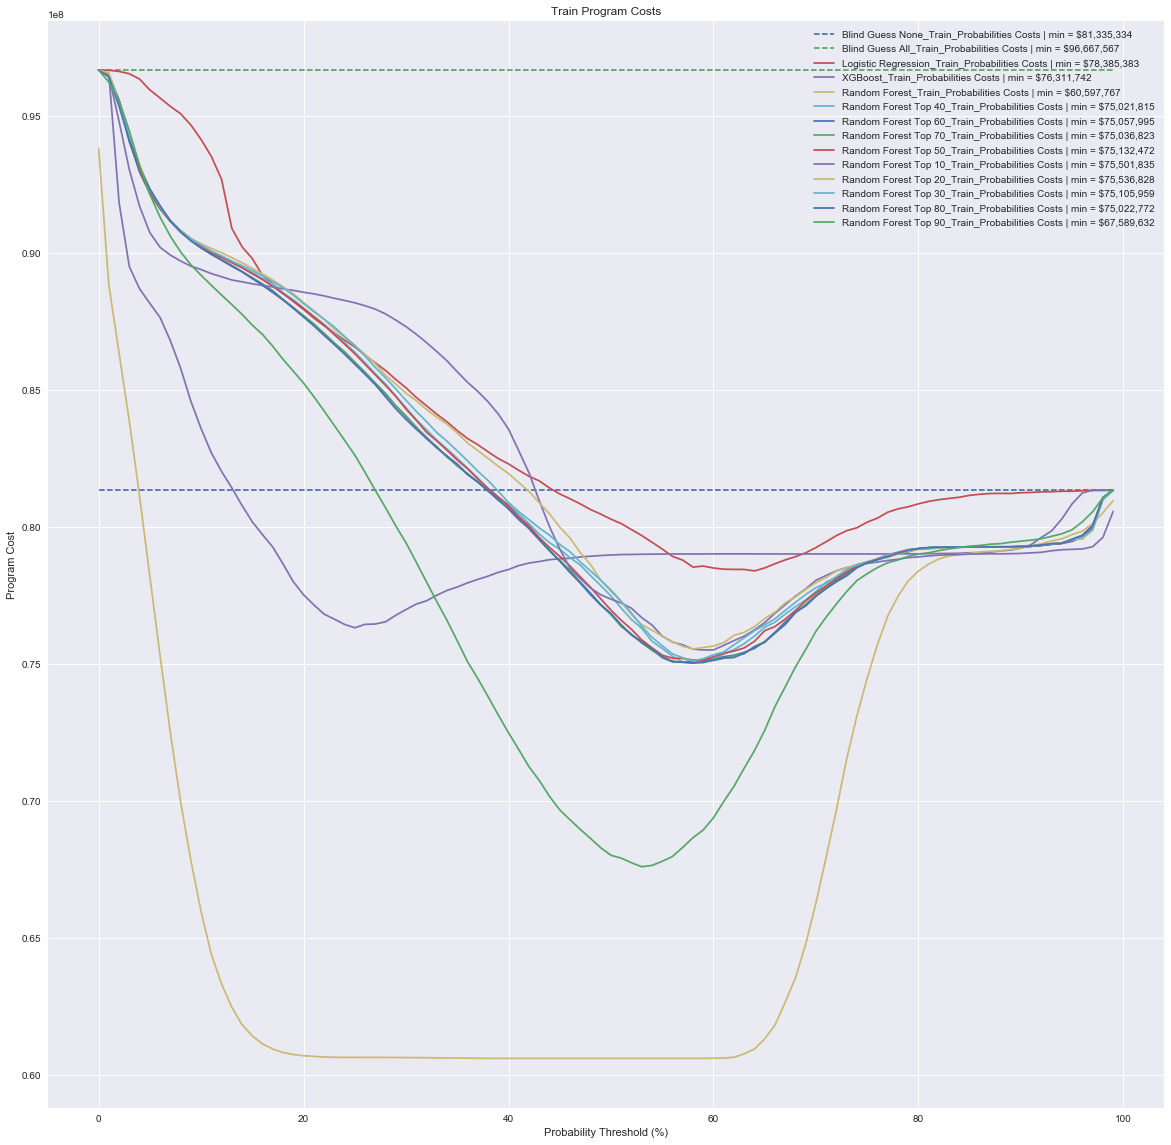

In [39]:
#plot_cost_effectiveness(train_predictions_df[['READMISSION']], train_predictions_df[train_probability_columns], 'Train')

/Users/ipatel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ipatel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


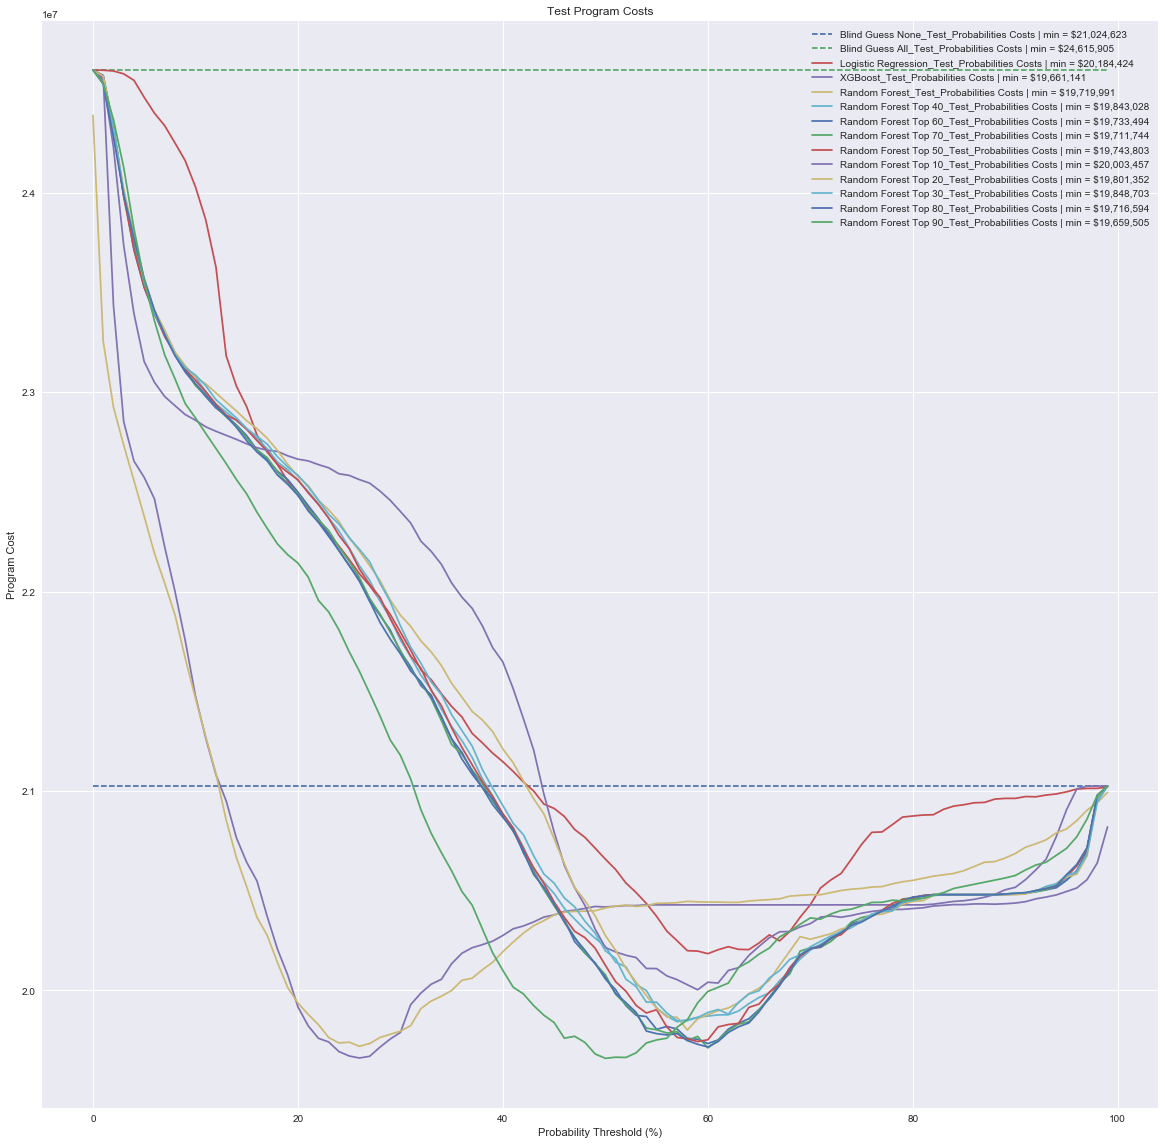

In [40]:
#plot_cost_effectiveness(test_predictions_df[['READMISSION']], test_predictions_df[test_probability_columns], 'Test')

 # Ensemble

In [41]:
def plot_model_output_corrplot(output):
    columns_corrplot = [column for column in test_predictions_df.columns if output in column and 'Blind' not in column]
    corrplot_df = test_predictions_df[columns_corrplot]
    corrplot_labels = [column.replace('_Test_{0}'.format(output, ''), '') for column in corrplot_df]
    sn.set(style="white")
    # Compute the correlation matrix
    corr = corrplot_df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sn.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sn.heatmap(corr, mask=mask, cmap=cmap, ax=ax, vmin=-1, xticklabels=corrplot_labels, yticklabels=corrplot_labels, annot=True)
    plt.title('Model {0} Correlation Matrix'.format(output))
    plt.show()

### Predictions

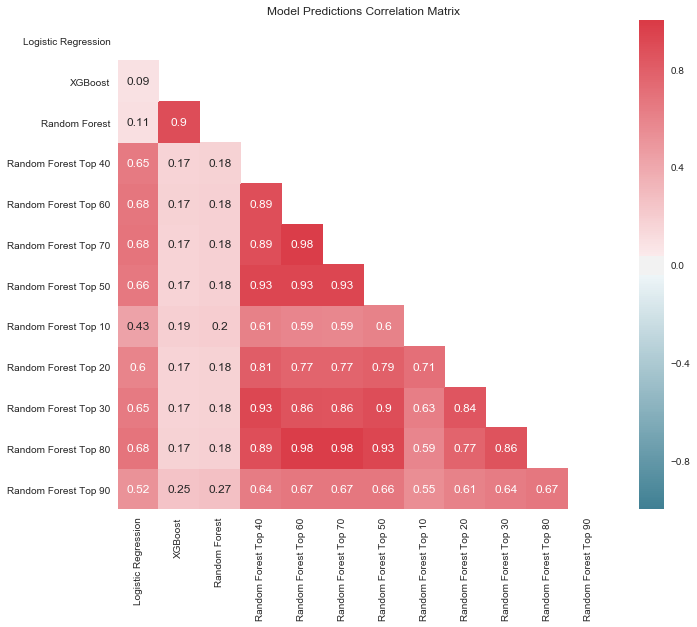

In [43]:
plot_model_output_corrplot('Predictions')

### Probabilities

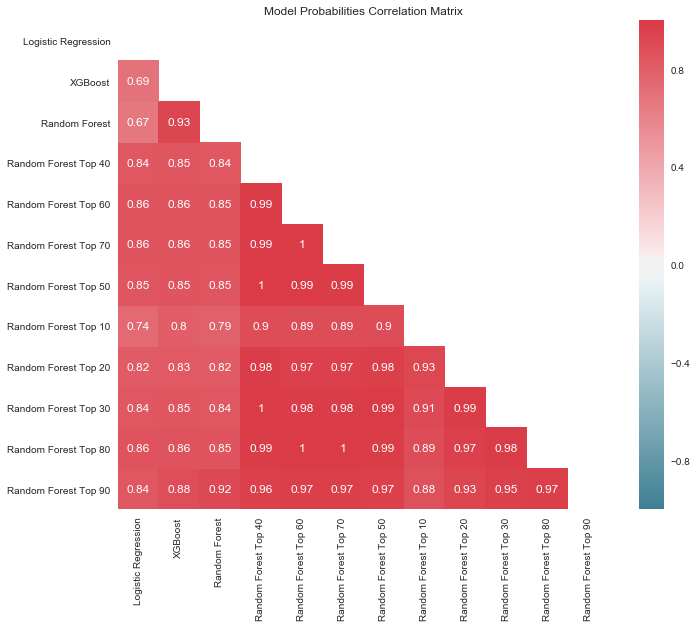

In [44]:
plot_model_output_corrplot('Probabilities')